# Exploratory Data Analysis (EDA): EV Adoption in Washington State


Exploratory data analysis of electric vehicle adoption in Washington State, conducted for **ISE 201:** **Mathematical Foundations for Decision & Data Science** in the MSAI program at San José State University, under the instruction of Professor Khaled Mabrouk.

- **Date:** December 16, 2025

- **Data:** [Electric Vehical Population](https://catalog.data.gov/dataset/electric-vehicle-population-data)

#Step One: Understand Problem & Data

The project explores electric vehicle adoption patterns in Washington State using data analysis and visualization to forecast future demand, and inform production and insfrastructure planning.

**Research questions:**
1. What is the distribution of battery electric vehicles (BEVs) vs. plug-in hybrid electric vehicles (PHEVs)?
2. Which counties and cities have the highest concentration of EVs?
3. Which manufacturers and models dominate the EV market?
4. How has adoption changed across model years?
5. How do electric range and base MSRP vary across manufacturers and models?
6. What is the relationship between range and clean alternative fuel vehicle (CAFV) eligibility?
7. Which electric utilities serve the largest EV populations?



#Step Two: Import & Inspect Data

In [149]:
# Install only once
# pip install adjustText


In [150]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap # to clean the labels for piecharts
import matplotlib.colors as mcolors # color for charts

from google.colab import drive
drive.mount('/content/drive')

from datetime import datetime
from adjustText import adjust_text # to avoid annotation overlap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Universal formatting
# Turn off scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Base color
base_color = "#1f77b4"

# Function to lighten the base color
def lighten(color, amount=0.5):
    """
    amount: 0 = original color, 1 = white
    """
    c = np.array(mcolors.to_rgb(color))
    white = np.array([1, 1, 1])
    return mcolors.to_hex(c + (white - c) * amount)

In [3]:
# Import
# File name
path = "/content/drive/MyDrive/Colab/2_ISE 201/Data/Project/"
filename = "Electric_Vehicle_Population_Data.csv"

# Load data
df = pd.read_csv(path + filename, encoding='latin1')

# Check data size
df.shape

(264628, 17)

In [4]:
# Preview dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.00,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.00,0.00,22.00,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,53067010910.00
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.00,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.00,0.00,15.00,318160860,POINT (-120.42083 46.44779),PACIFICORP,53077940008.00
2,1N4AZ0CP0F,King,Seattle,WA,98125.00,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.00,0.00,46.00,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700.00
3,WA1VAAGE5K,King,Kent,WA,98031.00,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.00,0.00,11.00,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029306.00
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.00,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,1.00,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051922.00


## Check null values

The dataset contains 264,628 rows and 17 columns, with missing values in 9 columns. Legislative District has the highest number of missing values (659), followed by Vehicle Location (17). All other columns have fewer than 10 missing values.

In [5]:
# Electric Vehicle Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264628 entries, 0 to 264627
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         264628 non-null  object 
 1   County                                             264619 non-null  object 
 2   City                                               264619 non-null  object 
 3   State                                              264628 non-null  object 
 4   Postal Code                                        264619 non-null  float64
 5   Model Year                                         264628 non-null  int64  
 6   Make                                               264628 non-null  object 
 7   Model                                              264628 non-null  object 
 8   Electric Vehicle Type                              264628 non-null  object

In [6]:
df.isna().sum()

,0
VIN (1-10),0
County,9
City,9
State,0
Postal Code,9
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


## Descriptive Statistics

### Electric Range

In [7]:
# Electric Range
print("Mean = ", df['Electric Range'].mean())
print("Standard Deviation = ", df['Electric Range'].std())
print("Median = ", df['Electric Range'].median())
print("Mode = ", df['Electric Range'].mode())
print("Minimum = ", df['Electric Range'].min())
print("Maximum = ", df['Electric Range'].max())
print("Count = ", df['Electric Range'].count())
print("Length =", len(df['Electric Range']))

Mean =  41.713159048310054
Standard Deviation =  80.37797717197819
Median =  0.0
Mode =  0   0.00
Name: Electric Range, dtype: float64
Minimum =  0.0
Maximum =  337.0
Count =  264624
Length = 264628


Electric Range shows a minimum, median, and mode of zero, indicating a large presence of zero values. Approximately 61% of records have an electric range of zero, and all of these belong to Battery Electric Vehicles (BEVs). Because BEVs inherently require a non-zero electric range, these values are interpreted as missing rather than valid observations.

In [8]:
# Count zero values in electric range
print((df['Electric Range'] == 0).sum())
print((df['Electric Range'] == 0).sum()/len(df['Electric Range'])*100)

163797
61.89707816255271


In [9]:
(df['Electric Range'] == 0).groupby(df['Electric Vehicle Type']).sum()

,Electric Range
Electric Vehicle Type,
Battery Electric Vehicle (BEV),163797
Plug-in Hybrid Electric Vehicle (PHEV),0


In [10]:
# Calculate electric range mean by vehicle type
df['Electric Range'].groupby(df['Electric Vehicle Type']).describe()


,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Battery Electric Vehicle (BEV),210575.00,44.32,89.63,0.00,0.00,0.00,0.00,337.00
Plug-in Hybrid Electric Vehicle (PHEV),54049.00,31.56,14.14,1.00,21.00,32.00,38.00,153.00


### Base MSRP

In [11]:
# Base MSRP
print("Mean = ", df['Base MSRP'].mean())
print("Standard Deviation = ", df['Base MSRP'].std())
print("Median = ", df['Base MSRP'].median())
print("Mode = ", df['Base MSRP'].mode())
print("Minimum = ", df['Base MSRP'].min())
print("Maximum = ", df['Base MSRP'].max())
print("Count = ", df['Base MSRP'].count())
print("Length =", len(df['Base MSRP']))

Mean =  678.90219707963
Standard Deviation =  6868.919926418542
Median =  0.0
Mode =  0   0.00
Name: Base MSRP, dtype: float64
Minimum =  0.0
Maximum =  845000.0
Count =  264624
Length = 264628


Similar to Electric Range, Base MSRP has a minimum, median, and mode of zero, reflecting a large concentration of zero values. Roughly 98% of observations have a base MSRP of zero, which is implausible given that all vehicles should have a non-zero base price. These values are interpreted as missing data.

In [12]:
# Count zero values in Base MSRP
print((df['Base MSRP'] == 0).sum())
print((df['Base MSRP'] == 0).sum()/len(df['Base MSRP'])*100)

261476
98.80889399458863


#Step Three: Handle Missing Data

The following columns are excluded from the analysis:
1. **Legislative District:** Political district identifier. While potentially useful for policy analysis, it is excluded here because the project focuses on market demand and EV adoption patterns at the county and city levels. Future analyses could incorporate legislative districts to examine the relationship between EV adoption and policy differences.
2. **Vehicle Location:** geographic coordinates mainly used for mapping; spatial analysis is not included in this project.
3. **Postal Code:** ZIP code level detail that is unnecessary for this analysis and redundant given higher-level geographic variables.
4. **2020 Census Tract:** census geography used for integration with U.S. Census data and mapping, which is outside the scope of this analysis.

In [13]:
# Drop columns that not being used
df_clean = df.drop(columns=['Legislative District',
                            'Vehicle Location',
                            '2020 Census Tract',
                            'Postal Code'])

# df_clean = df.drop(columns=['Legislative District',
#                             'Vehicle Location',
#                             '2020 Census Tract',
#                             'Postal Code',
#                             'VIN (1-10)',
#                             'DOL Vehicle ID'])

**Missing values after dropping columns:**

In [14]:
df_clean.isna().sum()

,0
VIN (1-10),0
County,9
City,9
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,4


**Missing values (4) in Electric Range and Base MSRP:** impute them with 0.

In [15]:
# View 4 rows that have missing electric range
df_clean[df_clean['Electric Range'].isna()]

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
11897,ZHWUC1ZM3S,King,Mercer Island,WA,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,279110842,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
28337,ZHWUC1ZM5S,King,Seattle,WA,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,282538896,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
51695,ZHWUC1ZM5S,Snohomish,Snohomish,WA,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,277331204,PUGET SOUND ENERGY INC
182701,ZHWUC1ZM9S,Spokane,Spokane,WA,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,284839649,BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...


In [16]:
# Impute missing electric range and Base MSRP with 0
num_to_impute = ['Electric Range', 'Base MSRP']
df_clean[num_to_impute] = df_clean[num_to_impute].fillna(0)

**Missing values (9) in County, City, Electric Utility:** impute them with the "Unknown" category

In [17]:
# View the 9 rows that have missing county
df_clean[df_clean['County'].isna()]

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
211,3FA6P0SU7E,NaN,NaN,AE,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.00,0.00,255045136,NaN
133651,7SAYGDEE0P,NaN,NaN,AP,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,282818525,NaN
139165,5YJXCAE24H,NaN,NaN,BC,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.00,0.00,159850029,NaN
146691,YV4ED3UR8N,NaN,NaN,BC,2022,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,272683309,NaN
146710,7SAYGDEE9N,NaN,NaN,BC,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,224286394,NaN
147713,7JRBR0FM0N,NaN,NaN,BC,2022,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.00,0.00,205035967,NaN
153275,5YJ3E1EA1J,NaN,NaN,QC,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.00,0.00,245011189,NaN
156503,5YJYGDEE8M,NaN,NaN,ON,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,225831427,NaN
157609,WVGTMPE23M,NaN,NaN,AE,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.00,0.00,179339058,NaN


In [18]:
# Impute missing value in County, City, Postal Code, Electric Utility with 'Unknown'
cat_to_impute = ['County', 'City', 'Electric Utility']
df_clean[cat_to_impute] = df_clean[cat_to_impute].fillna('Unknown')

**No missing values after imputation:**

In [19]:
# Check missing values after imputation
df_clean.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0


#Step Four: Explore Data Patterns

## Numerical Variables - Electric Range

**Descriptive statistics of the full dataset:**

In [20]:
df_clean[['Electric Range']].describe()

,Electric Range
count,264628.00
mean,41.71
std,80.38
min,0.00
25%,0.00
50%,0.00
75%,34.00
max,337.00


**Descriptive statistics of the non-zero electric range subset:**

In [21]:
# Filter non-zero electric range
df_non_zero_ER = df_clean[df_clean['Electric Range'] != 0]

In [22]:
df_non_zero_ER[['Electric Range']].describe()

,Electric Range
count,100827.00
mean,109.48
std,97.66
min,1.00
25%,30.00
50%,53.00
75%,215.00
max,337.00


In [23]:
# Describe ER by Electric Vehicle Type
df_non_zero_ER['Electric Range'].groupby(df_non_zero_ER['Electric Vehicle Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Electric Vehicle Type,,,,,,,,
Battery Electric Vehicle (BEV),46778.00,199.50,72.16,29.00,150.00,215.00,238.00,337.00
Plug-in Hybrid Electric Vehicle (PHEV),54049.00,31.56,14.14,1.00,21.00,32.00,38.00,153.00


**Histograms: full dataset vs. non-zero subset**

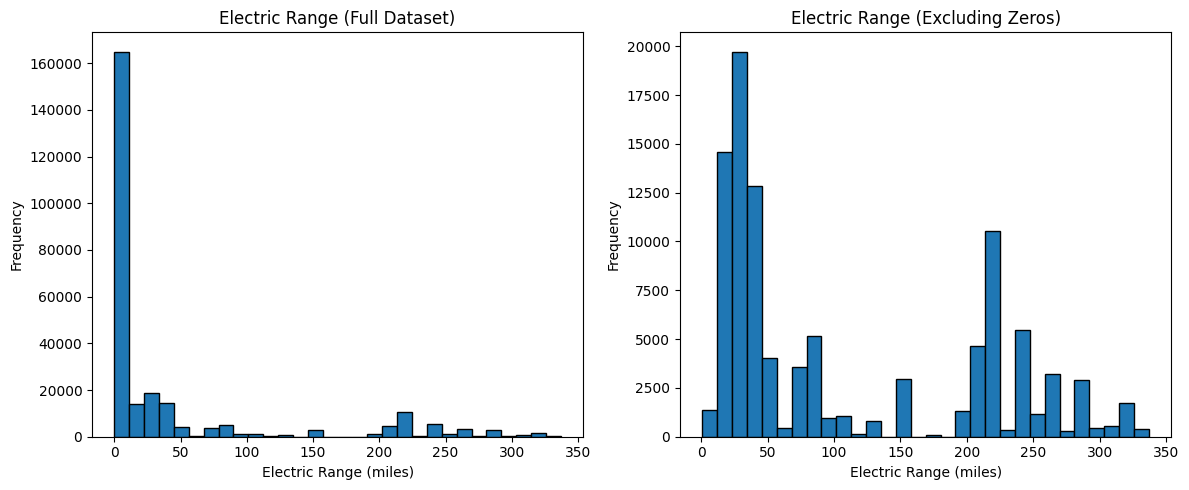

In [24]:
# Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # make it wider for readability

# Histogram for Electric Range with 0 data
axes[0].hist(df_clean['Electric Range'], bins=30, edgecolor='black')
axes[0].set_title('Electric Range (Full Dataset)')
axes[0].ticklabel_format(style='plain')  # avoid scientific notation
axes[0].set_xlabel('Electric Range (miles)')
axes[0].set_ylabel('Frequency')

# Histogram for Electric Range
axes[1].hist(df_non_zero_ER['Electric Range'], bins=30, edgecolor='black')
axes[1].set_title('Electric Range (Excluding Zeros)')
axes[1].ticklabel_format(style='plain')  # avoid scientific notation
axes[1].set_xlabel('Electric Range (miles)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # adjust spacing
plt.show()

**Histogram of non-zero electric range by electric vehicle type:**

The histogram of non-zero electric range shows two distinct clusters. To investigate whether this pattern is driven by differences between electric vehicle types, we further examine the distribution of electric range by vehicle type.

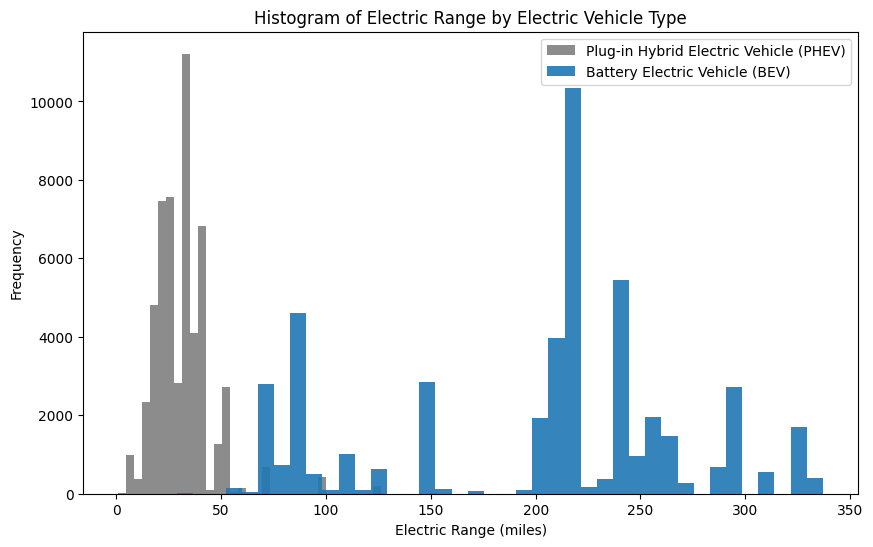

In [25]:
# Create histogram by EV type
ev_types = df_non_zero_ER["Electric Vehicle Type"].unique()

# Set the color
colors = ["grey", base_color]
# colors = ["#183c40", "#799da7"]

# Set the size for the graph
plt.figure(figsize=(10, 6))

# Draw the graph for each vehicle type
for ev, color in zip(ev_types, colors):
    subset = df_non_zero_ER[df_non_zero_ER["Electric Vehicle Type"] == ev]
    plt.hist(subset["Electric Range"].dropna(),
             alpha=0.9,
             bins=40,
             label=ev,
             color=color)

# Plot lables
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.title("Histogram of Electric Range by Electric Vehicle Type")
plt.legend()
plt.show()

**Boxplots of non-zero electric range by electric vehicle type:**

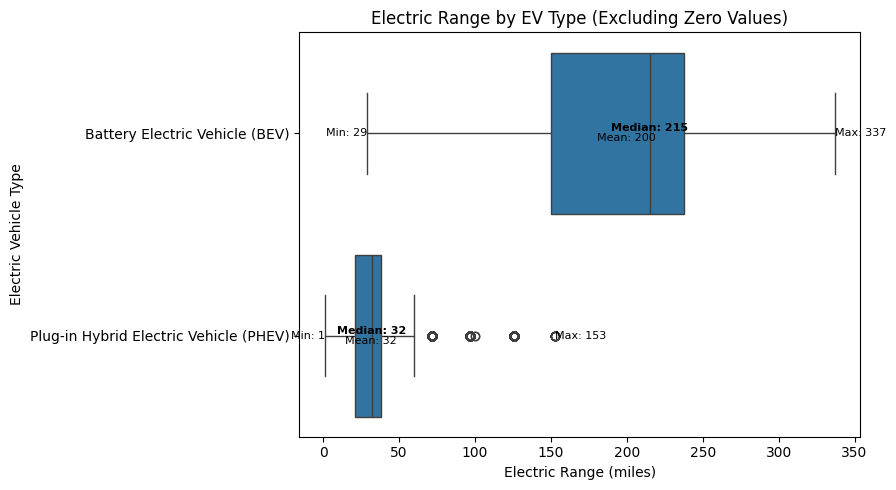

In [26]:
# Force a consistent EV-type order
ev_order = [
    "Battery Electric Vehicle (BEV)",
    "Plug-in Hybrid Electric Vehicle (PHEV)"
]

# # Custom colors
# palette = {
#     "Battery Electric Vehicle (BEV)": "#183c40",
#     "Plug-in Hybrid Electric Vehicle (PHEV)": "#799da7"
# }

# Set the size for the graph
plt.figure(figsize=(9, 5))

# Horizontal box plot
ax = sns.boxplot(
    data=df_non_zero_ER,
    y="Electric Vehicle Type",
    x="Electric Range",
    order=ev_order#,
    # palette=palette
)

# Stats in the SAME order as the plot
stats = (
    df_non_zero_ER
    .groupby("Electric Vehicle Type")["Electric Range"]
    .agg(["min", "median", "mean", "max"])
    .reindex(ev_order)
)

# Annotate min / median / mean / max
for i, ev_type in enumerate(ev_order):
    if ev_type not in stats.index or stats.loc[ev_type].isna().any():
        continue

    x_min  = stats.loc[ev_type, "min"]
    x_med  = stats.loc[ev_type, "median"]
    x_mean = stats.loc[ev_type, "mean"]
    x_max  = stats.loc[ev_type, "max"]

    ax.text(x_min,  i, f"Min: {x_min:.0f}",    va="center", ha="right",  fontsize=8)
    ax.text(x_med,  i, f"Median: {x_med:.0f}", va="bottom", ha="center", fontsize=8, fontweight="bold")
    ax.text(x_mean, i, f"Mean: {x_mean:.0f}",  va="top",    ha="center", fontsize=8, color="black")
    ax.text(x_max,  i, f"Max: {x_max:.0f}",    va="center", ha="left",   fontsize=8)

# Labels
plt.title("Electric Range by EV Type (Excluding Zero Values)")
plt.xlabel("Electric Range (miles)")
plt.tight_layout()
plt.show()

## Numerical Variables - Base MSRP

**Descriptive statistics of the full dataset:**

In [27]:
df_clean[['Base MSRP']].describe()

,Base MSRP
count,264628.00
mean,678.89
std,6868.87
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,845000.00


**Descriptive statistics of the non-zero base MSRP subset:**

In [28]:
# Filter non-zero Base MSRP
df_non_zero_MSRP = df_clean[df_clean['Base MSRP'] != 0]

In [29]:
# Describe only Base MSRP
df_non_zero_MSRP['Base MSRP'].describe()

,Base MSRP
count,3148.00
mean,57069.19
std,27354.07
min,31950.00
25%,39221.25
50%,55700.00
75%,69900.00
max,845000.00


**Histograms of Base MSRP: full dataset vs. non-zero subset**

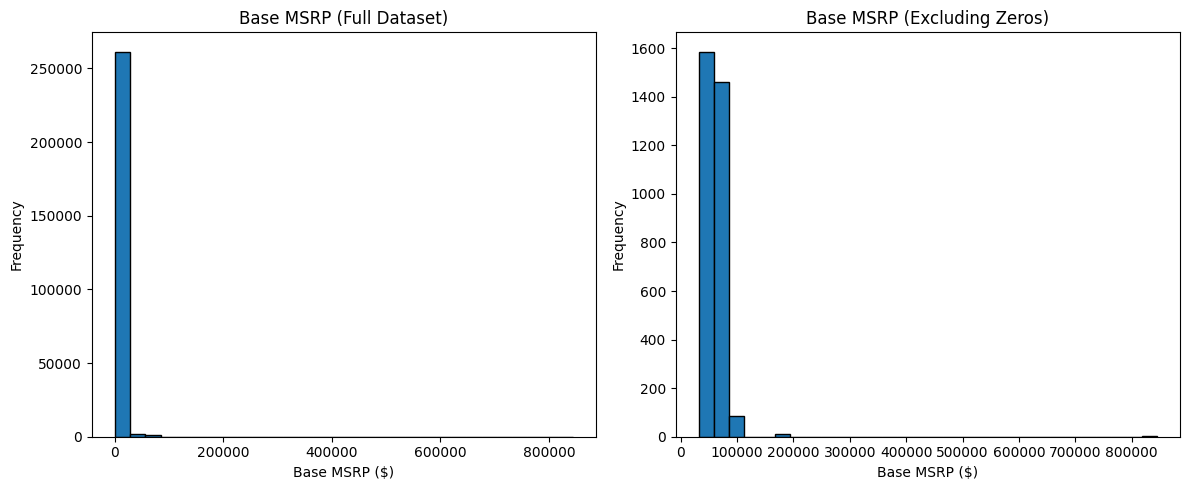

In [30]:
# Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # make it wider for readability

# Histogram for Base MSRP
axes[0].hist(df_clean['Base MSRP'], bins=30, edgecolor='black')
axes[0].set_title('Base MSRP (Full Dataset)')
axes[0].ticklabel_format(style='plain')  # avoid scientific notation
axes[0].set_xlabel('Base MSRP ($)')
axes[0].set_ylabel('Frequency')

# Histogram for Base MSRP
axes[1].hist(df_non_zero_MSRP['Base MSRP'], bins=30, edgecolor='black')
axes[1].set_title('Base MSRP (Excluding Zeros)')
axes[1].ticklabel_format(style='plain')  # avoid scientific notation
axes[1].set_xlabel('Base MSRP ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # adjust spacing
plt.show()

**Descriptive statistics of the non-zero base MSRP subset excluding outliers:**

In [31]:
# Remove Base MSRP > 150k
df_MSRP_no_outliers = df_non_zero_MSRP[df_non_zero_MSRP['Base MSRP'] <= 150000]

In [32]:
# Describe Base MSRP after excluding zeros and outliers
df_MSRP_no_outliers['Base MSRP'].describe()

,Base MSRP
count,3133.00
mean,56037.86
std,16941.74
min,31950.00
25%,36900.00
50%,55700.00
75%,69900.00
max,110950.00


**Histogram of non-zero Base MSRP after outlier removal:**

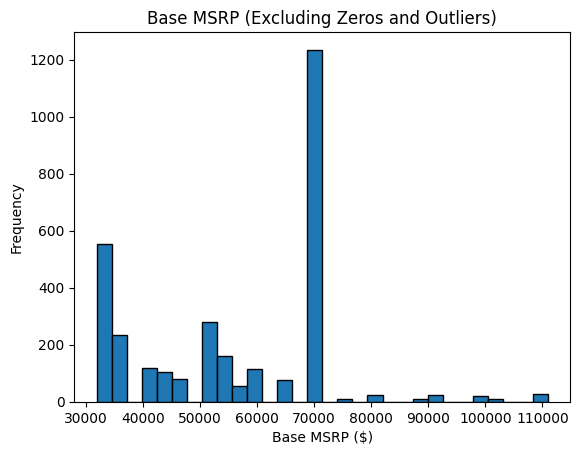

In [33]:
# Histogram of MSRP wo outliers and zeros
plt.hist(df_MSRP_no_outliers['Base MSRP'], bins=30, edgecolor='black')

plt.title('Base MSRP (Excluding Zeros and Outliers)')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()

## Categorical variables

In [34]:
# Transform model year from numerical to categorical
df_clean['Model Year'] = pd.Categorical(df_clean['Model Year'])

In [35]:
# describe all
df_clean[['County', 'City', 'State', 'Make', 'Model',
          'Electric Vehicle Type',
          'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
          'Electric Utility',
          'Model Year']].describe(include='all').transpose()

,count,unique,top,freq
County,264628,240,King,131179
City,264628,859,Seattle,41533
State,264628,51,WA,263969
Make,264628,46,TESLA,108633
Model,264628,182,MODEL Y,55187
Electric Vehicle Type,264628,2,Battery Electric Vehicle (BEV),210575
Clean Alternative Fuel Vehicle (CAFV) Eligibility,264628,3,Eligibility unknown as battery range has not b...,163797
Electric Utility,264628,77,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),94223
Model Year,264628,22,2023,60157


**Distributions of EV types and CAFV eligibility**

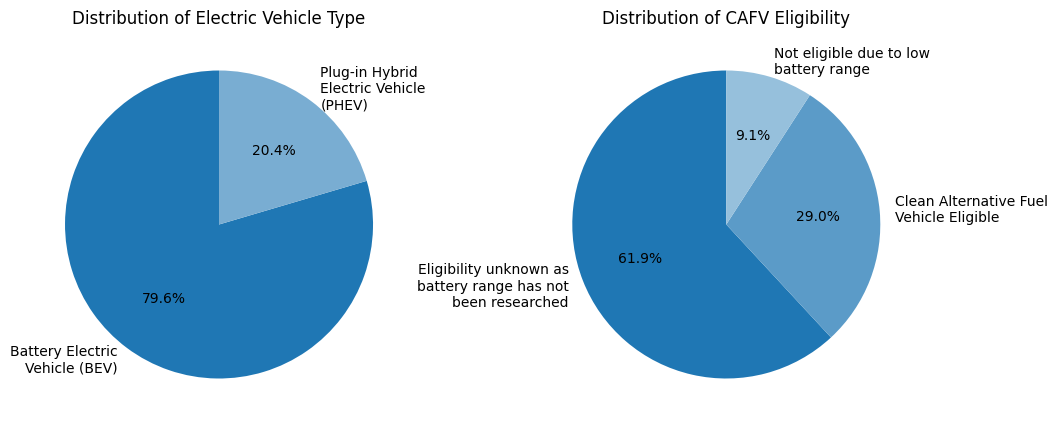

In [36]:
# Draw pie charts for Electric Vehicle Type and CAFV eligibility
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Electric Vehicle Type Counts
ev_counts = df['Electric Vehicle Type'].value_counts()

# EV labels
ev_labels = [textwrap.fill(label, width=18) for label in ev_counts.index]

# Create a list of shades (slightly lighter each time)
n_ev = len(ev_counts)
ev_colors = [lighten(base_color, amount=i*(0.8/n_ev)) for i in range(n_ev)]

# EV pie chart
axes[0].pie(ev_counts, labels=ev_labels, autopct='%1.1f%%', colors=ev_colors, startangle=90)
axes[0].set_title("Distribution of Electric Vehicle Type")


# CAFV eligibility counts
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Set a width for EV pie chart
cafv_labels = [textwrap.fill(label, width=24) for label in cafv_counts.index]

# CAFV colors
n_cafv = len(cafv_counts)
cafv_colors = [lighten(base_color, amount=i*(0.8/n_cafv)) for i in range(n_cafv)]

# CAFV pie chart
axes[1].pie(cafv_counts, labels=cafv_labels, autopct='%1.1f%%', colors=cafv_colors, startangle=90)
axes[1].set_title("Distribution of CAFV Eligibility")

plt.show()

**Descriptive statistics of electric range by CAFV Eligibility:**

In [37]:
# Describe ER by CAFV Eligibility
df_clean['Electric Range'].groupby(df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility']).describe()

,count,mean,std,min,25%,50%,75%,max
Clean Alternative Fuel Vehicle (CAFV) Eligibility,,,,,,,,
Clean Alternative Fuel Vehicle Eligible,76677.00,137.44,96.27,0.00,40.00,97.00,220.00,337.00
Eligibility unknown as battery range has not been researched,163797.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Not eligible due to low battery range,24154.00,20.69,4.91,1.00,18.00,21.00,25.00,29.00


#Step Five: Transform Data

1. Convert Model Year from numerical to categorical in the previous step
2. Create new variables (City_County, Model_Make) to improve visualization clarity

In [38]:
# Create a column City + County
df_clean['City_County'] = df_clean['City'] + '_' + df_clean['County']

In [39]:
# Create a column Model + Make
df_clean['Model_Make'] = df_clean['Model'] + '_' + df_clean['Make']

3. Encode categorical variables for correlation analysis:
- Electric Vehicle Type
- CAFV eligibility
- Make
- Model
- County
- Electric Utility

In [40]:
# Mapping Electric Vehicle Type
mapping_EV = {'Battery Electric Vehicle (BEV)': 1, 'Plug-in Hybrid Electric Vehicle (PHEV)': 2}

df_clean['EV_Type_Code'] = df_clean['Electric Vehicle Type'].map(mapping_EV)
df_non_zero_MSRP.loc[:,'EV_Type_Code'] = df_non_zero_MSRP['Electric Vehicle Type'].map(mapping_EV)
df_MSRP_no_outliers.loc[:,'EV_Type_Code'] = df_MSRP_no_outliers['Electric Vehicle Type'].map(mapping_EV)

/tmp/ipython-input-3745503787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:,'EV_Type_Code'] = df_non_zero_MSRP['Electric Vehicle Type'].map(mapping_EV)
/tmp/ipython-input-3745503787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:,'EV_Type_Code'] = df_MSRP_no_outliers['Electric Vehicle Type'].map(mapping_EV)


In [41]:
# Mapping CAFV eligibility
mapping_CAFV = {'Clean Alternative Fuel Vehicle Eligible': 1,
                'Not eligible due to low battery range': 2,
                'Eligibility unknown as battery range has not been researched': 3}

df_clean['CAFV_Code'] = df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(mapping_CAFV)
df_non_zero_MSRP.loc[:,'CAFV_Code'] = df_non_zero_MSRP['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(mapping_CAFV)
df_MSRP_no_outliers.loc[:,'CAFV_Code'] = df_MSRP_no_outliers['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(mapping_CAFV)

/tmp/ipython-input-3359014970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:,'CAFV_Code'] = df_non_zero_MSRP['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(mapping_CAFV)
/tmp/ipython-input-3359014970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:,'CAFV_Code'] = df_MSRP_no_outliers['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(mapping_CAFV)


In [42]:
# Mapping Make
mapping_make = {'AUDI':1, 'NISSAN':2, 'TESLA':3, 'KIA':4, 'HYUNDAI':5, 'JEEP':6, 'BMW':7, 'FORD':8,
       'LINCOLN':9, 'SMART':10, 'LEXUS':11, 'RIVIAN':12, 'CHRYSLER':13, 'CHEVROLET':14,
       'HONDA':15, 'VOLVO':16, 'VOLKSWAGEN':17, 'TOYOTA':18, 'FIAT':19, 'POLESTAR':20,
       'PORSCHE':21, 'SUBARU':22, 'ACURA':23, 'MAZDA':24, 'MERCEDES-BENZ':25, 'GENESIS':26,
       'DODGE':27, 'GMC':28, 'MINI':29, 'CADILLAC':30, 'LUCID':31, 'FISKER':32,
       'LAND ROVER':33, 'MITSUBISHI':34, 'ALFA ROMEO':35, 'RAM':36, 'ROLLS-ROYCE':37,
       'JAGUAR':38, 'VINFAST':39, 'LAMBORGHINI':40, 'BRIGHTDROP':41, 'AZURE DYNAMICS':42,
       'MULLEN AUTOMOTIVE INC.':43, 'BENTLEY':44, 'TH!NK':45,
       'WHEEGO ELECTRIC CARS':46}

df_clean['Make_Code'] = df_clean['Make'].map(mapping_make)
df_non_zero_MSRP.loc[:,'Make_Code'] = df_non_zero_MSRP['Make'].map(mapping_make)
df_MSRP_no_outliers.loc[:,'Make_Code'] = df_MSRP_no_outliers['Make'].map(mapping_make)

/tmp/ipython-input-993561783.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:,'Make_Code'] = df_non_zero_MSRP['Make'].map(mapping_make)
/tmp/ipython-input-993561783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:,'Make_Code'] = df_MSRP_no_outliers['Make'].map(mapping_make)


In [43]:
# Mapping Model
# Consider to use csv for this
mapping_model = {'Q5 E':1, 'A3':2, 'LEAF':3, 'E-TRON':4, 'MODEL X':5, 'SOUL':6, 'NIRO':7,
       'TUCSON':8, 'WRANGLER':9, 'MODEL Y':10, 'MODEL S':11, 'MODEL 3':12, 'X5':13,
       'C-MAX':14, 'AVIATOR':15, 'FORTWO':16, 'NX':17, 'SPORTAGE':18, 'I3':19, 'R1T':20,
       'PACIFICA':21, 'VOLT':22, 'BOLT EV':23, 'FUSION':24, 'CLARITY':25, 'ESCAPE':26,
       'V60':27, 'EV6':28, 'EQ FORTWO':29, 'R1S':30, 'E-GOLF':31, 'EX90':32,
       'RAV4 PRIME (PHEV)':33, 'ID.4':34, 'KONA':35, 'PROLOGUE':36, 'GRAND CHEROKEE':37,
       '500':38, 'PS2':39, 'SORENTO':40, 'Q5':41, 'EV9':42, 'PRIUS PRIME (PHEV)':43, 'Q4':44,
       'XC90':45, 'I4':46, 'IX':47, 'PANAMERA':48, '740E':49, 'F-150':50, 'SOLTERRA':51,
       'IONIQ 5':52, 'XM':53, 'XC60':54, 'BZ4X':55, 'ZDX':56, 'FOCUS':57, '330E':58, 'SPARK':59,
       'CX-90':60, '530E':61, 'C40':62, 'CYBERTRUCK':63, 'B-CLASS':64, 'XC40':65, 'X3':66,
       'I8':67, 'GLE-CLASS':68, 'CAYENNE':69, '500E':70, 'BOLT EUV':71, 'EX30':72, 'GV70':73,
       'IONIQ 6':74, 'IONIQ 9':75, 'MUSTANG MACH-E':76, 'ROADSTER':77, 'PRIUS':78,
       'CHARGER':79, 'TAYCAN':80, 'HUMMER EV PICKUP':81, 'TRANSIT':82, 'RS E-TRON GT':83,
       'HARDTOP':84, 'ID. BUZZ':85, 'GLC-CLASS':86, 'RZ':87, 'LYRIQ':88, 'BLAZER':89,
       'E-TRON GT':90, 'S60':91, 'AIR':92, 'OCEAN':93, 'EQE-CLASS SUV':94, 'S-CLASS':95,
       'I5':96, 'CORSAIR':97, 'HORNET':98, 'ARIYA HATCHBACK':99, 'RAV4':100,
       'RANGE ROVER':101, 'OUTLANDER':102, 'EQUINOX':103, 'Q6':104, 'TONALE':105, 'OPTIQ':106,
       'MACAN':107, 'ARIYA MPV':108, 'OPTIMA':109, 'EQB-CLASS':110, 'EQS-CLASS SUV':111,
       'PROMASTER 3500':112, 'WAGONEER S':113, 'COUNTRYMAN':114, 'EX40':115, 'GV60':116, 'Q8':117,
       'SANTA FE':118, 'CX-70':119, 'IONIQ':120, 'HUMMER EV SUV':121, 'EQE-CLASS SEDAN':122,
       'SIERRA':123, 'EQS-CLASS SEDAN':124, 'SQ6':125, 'SONATA':125,
       'FORTWO ELECTRIC DRIVE':127, 'CROSSTREK':128, '550E':129, 'SILVERADO':130, 'RX':131,
       'VISTIQ':132, 'M5':133, 'E-TRON SPORTBACK':134, 'E-CLASS':135, 'RANGE ROVER SPORT':136,
       'G-CLASS':137, 'POLESTAR 3':138, 'S E-TRON GT':139, 'SPECTRE':140, 'I-PACE':141,
       'ACCORD':142, 'I-MIEV':143, 'MX-30':144, 'TX':145, 'A6':146, 'GRAVITY':147, 'KARMA':148,
       '745E':149, 'SQ8':150, 'VF 8':151, 'BRIGHTDROP':152, 'REVUELTO':153, 'ELR':154, 'AMG GT':155,
       'C-CLASS':156, 'I7':157, 'S6':158, 'EDV':159, 'S90':160, 'CT6':161, 'ZEVO':162, 'IONIQ 5 N':163,
       'RANGER':164, 'URUS':165, 'RCV':166, 'ESPRINTER':167, 'G80':168,
       'TRANSIT CONNECT ELECTRIC':169, 'SL-CLASS':170, 'ONE':171, '918':172, 'BENTAYGA':173,
       'A7 E':174, '750E':175, '745LE':176, 'CITY':177, 'FLYING SPUR':178, 'WHEEGO':179, 'A8 E':180,
       'CONTINENTAL':181, 'MIRAI':182}

df_clean['Model_Code'] = df_clean['Model'].map(mapping_model)
df_non_zero_MSRP.loc[:, 'Model_Code'] = df_non_zero_MSRP['Model'].map(mapping_model)
df_MSRP_no_outliers.loc[:, 'Model_Code'] = df_MSRP_no_outliers['Model'].map(mapping_model)

/tmp/ipython-input-3383006644.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:, 'Model_Code'] = df_non_zero_MSRP['Model'].map(mapping_model)
/tmp/ipython-input-3383006644.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:, 'Model_Code'] = df_MSRP_no_outliers['Model'].map(mapping_model)


In [44]:
# Mapping county
# Consider to use csv for this
mapping_county = {'Thurston':1, 'Yakima':2, 'King':3, 'Snohomish':4, 'Kitsap':5, 'Sauk':6,
       'Island':7, 'Fresno':8, 'Whitman':9, 'Spokane':10, 'Skagit':11, 'Walla Walla':12,
       'Douglas':13, 'Chelan':14, 'Kittitas':15, 'Unknown':16, 'Stevens':17, 'Grant':18,
       'Clark':19, 'Bannock':20, 'Lewis':21, 'Pierce':22, 'Benton':23, 'Whatcom':24,
       'Clallam':25, 'San Juan':26, 'Jefferson':27, 'Mason':28, 'Pend Oreille':29,
       'Cowlitz':30, 'Klickitat':31, 'Grays Harbor':32, 'Pacific':33, 'Adams':34,
       'Franklin':35, 'Okanogan':36, 'San Diego':37, 'Garfield':38, 'Ferry':39,
       'Lincoln':40, 'Wahkiakum':41, 'Skamania':42, 'Asotin':43, 'El Paso':44,
       'Los Angeles':45, 'Riverside':46, 'Anne Arundel':47, "Prince George's":48,
       'Churchill':49, 'Gwinnett':50, 'Columbia':51, 'Hillsborough':52, 'Miami-Dade':53,
       'Fairfax':54, 'New York':55, 'Orange':56, 'Forsyth':57, 'Arlington':58, 'Marin':59,
       'Philadelphia':60, 'Guam':61, 'Ventura':62, 'Maricopa':63, 'Multnomah':64,
       'Chesapeake':65, 'St. Charles':66, "St. Mary's":67, 'Cook':68, 'Kings':69,
       'Cuyahoga':70, 'Alexandria':71, 'Leavenworth':72, 'Middlesex':73,
       'District of Columbia':74, 'Collin':75, 'San Bernardino':76, 'Miller':77,
       'Allegheny':78, 'Harris':79, 'Pinal':80, 'Shelby':81, 'Bucks':82, 'Kent':83,
       'Williamson':84, 'Duval':85, 'Berkeley':86, 'Okaloosa':87, 'Hoke':88, 'Suffolk':89,
       'Harnett':90, 'Cumberland':91, 'Saratoga':92, 'Calvert':93, 'Montgomery':94,
       'Yuba':95, 'Denver':96, 'Polk':97, 'Santa Clara':98, 'York':99, 'Lake':100, 'DeKalb':101,
       'Maui':102, 'Niagara':103, 'Contra Costa':104, 'Bexar':105, 'Harford':106, 'Washoe':107,
       'Travis':108, 'Milwaukee':109, 'Sarpy':110, 'DuPage':111, 'Monterey':112, 'Charles':113,
       'Sussex':114, 'Hamilton':115, 'Ada':116, 'Alameda':117, 'Newport':118, 'Palm Beach':119,
       'Galveston':120, 'Elmore':121, 'James City':122, 'Albemarle':123, 'Henrico':124,
       'Broward':125, 'Washington':126, 'Virginia Beach':127, 'Centre':128, 'Talladega':129,
       'Kootenai':130, 'Olmsted':131, 'Mercer':132, 'Prince William':133, 'Weber':134,
       'Ocean':135, 'Platte':136, 'Bell':137, 'Barnstable':138, 'Autauga':139, 'Richmond':140,
       'Placer':141, 'San Mateo':142, 'Pulaski':143, 'Clackamas':144, 'Honolulu':145,
       'Salt Lake':145, 'Cochise':146, 'Stafford':147, 'Norfolk':148, 'Portsmouth':149,
       'Kane':150, 'Geary':151, 'Escambia':152, 'Monmouth':153, 'Beaver':154, 'Nueces':155,
       'Camden':156, 'Currituck':157, 'Anchorage':158, 'Santa Cruz':159, 'Schuylkill':160,
       'Hartford':161, 'Tooele':162, 'Comanche':163, 'Loudoun':164, 'Washtenaw':165, 'Riley':166,
       'Penobscot':167, 'Davidson':168, 'Frederick':169, 'Stanislaus':170, 'Atlantic':171,
       'Manatee':172, 'Manassas':173, 'Meade':174, 'Sacramento':175, 'Johnson':176,
       'Muscogee':177, 'Dallas':178, 'Hudson':179, 'St. Louis':180, 'San Luis Obispo':181,
       'Lexington':182, 'Sonoma':183, 'Marion':184, 'Denton':185, 'Weld':186, 'Greene':187,
       'Cobb':188, 'Laramie':189, 'Oldham':190, 'Otero':191, 'Caddo':192, 'Macomb':193,
       'La Plata':194, 'San Francisco':195, 'Burlington':196, 'Allen':197, 'Larimer':198,
       'Fort Bend':199, 'Jackson':200, 'Wake':201, 'Dale':202, 'New London':203, 'Moore':204,
       'St. Clair':205, 'Pima':206, 'Howard':207, 'Lee':208, 'Arapahoe':209, 'Solano':210, 'Knox':211,
       'Rockingham':212, 'St. Landry':213, 'Brown':214, 'Beaufort':215, 'Brevard':216,
       'Kauai':217, 'Texas':218, 'Saginaw':219, 'Nassau':220, 'Wayne':221, 'Carroll':222,
       'Charlottesville':223, 'Clay':224, 'Sarasota':225, 'Tarrant':226, 'Cleveland':227,
       'Prince George':228, 'Medina':229, 'Essex':230, 'Monroe':231, 'Kern':232, 'Houston':233,
       'Hardin':234, 'Hennepin':235, 'Bristol':236, 'Madison':237, 'Nye':238, 'Osceola':239}

df_clean['County_Code'] = df_clean['County'].map(mapping_county)
df_non_zero_MSRP.loc[:, 'County_Code'] = df_non_zero_MSRP['County'].map(mapping_county)
df_MSRP_no_outliers.loc[:, 'County_Code'] = df_MSRP_no_outliers['County'].map(mapping_county)

/tmp/ipython-input-1047517065.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:, 'County_Code'] = df_non_zero_MSRP['County'].map(mapping_county)
/tmp/ipython-input-1047517065.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:, 'County_Code'] = df_MSRP_no_outliers['County'].map(mapping_county)


In [45]:
# Mapping electric utility
# Consider to use csv for this
mapping_utility = {'PUGET SOUND ENERGY INC':1, 'PACIFICORP':2,
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)':3,
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)':4,
       'NON WASHINGTON STATE ELECTRIC UTILITY':5, 'AVISTA CORP':6,
       'MODERN ELECTRIC WATER COMPANY':7, 'PUD NO 1 OF DOUGLAS COUNTY':8,
       'PUD NO 1 OF CHELAN COUNTY':9, 'Unknown':10, 'PUD NO 2 OF GRANT COUNTY':11,
       'PORTLAND GENERAL ELECTRIC CO':12,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)':13,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF CENTRALIA - (WA)|CITY OF TACOMA - (WA)':14,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY':15,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY':16,
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY':17,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY':18,
       'BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP':19,
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY':20,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||OHOP MUTUAL LIGHT COMPANY, INC|PENINSULA LIGHT COMPANY':21,
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY':22,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF RICHLAND - (WA)':23,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 3 OF MASON COUNTY':24,
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY':25,
       'PUD NO 1 OF PEND OREILLE COUNTY':26,
       'CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP':27,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY':28,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KLICKITAT COUNTY':29,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBOR COUNTY':30,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF PACIFIC COUNTY':31,
       'BONNEVILLE POWER ADMINISTRATION||TOWN OF STEILACOOM|CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY':32,
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)':33,
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC':34,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA LIGHT COMPANY':35,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF FRANKLIN COUNTY':36,
       'NO KNOWN ELECTRIC UTILITY SERVICE':37,
       'OKANOGAN COUNTY ELEC COOP, INC':38,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||LAKEVIEW LIGHT & POWER|PENINSULA LIGHT COMPANY':39,
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15':40,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PARKLAND LIGHT & WATER COMPANY|PENINSULA LIGHT COMPANY':41,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)':42,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF LEWIS COUNTY':43,
       'BONNEVILLE POWER ADMINISTRATION||TOWN OF EATONVILLE - (WA)|CITY OF TACOMA - (WA)':44,
       'BONNEVILLE POWER ADMINISTRATION||INLAND POWER & LIGHT COMPANY':45,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF FERRY COUNTY':46,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY':47,
       'CITY OF BLAINE - (WA)||PUD NO 1 OF WHATCOM COUNTY':48,
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||BENTON RURAL ELECTRIC ASSN':49,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY':50,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)':51,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ANGELES - (WA)':52,
       'BONNEVILLE POWER ADMINISTRATION||BIG BEND ELECTRIC COOP, INC':53,
       'PUD NO 1 OF WHATCOM COUNTY':54, 'PUD NO 1 OF OKANOGAN COUNTY':55,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF WAHKIAKUM COUNTY':56,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF SKAMANIA CO':57,
       'CITY OF TACOMA - (WA)':58,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF MASON COUNTY':59,
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY':60,
       'BONNEVILLE POWER ADMINISTRATION||TOWN OF RUSTON - (WA)|CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY':61,
       'CITY OF SUMAS - (WA)||PUD NO 1 OF WHATCOM COUNTY':62,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)':63,
       'CITY OF CHENEY - (WA)':64,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KITTITAS COUNTY':65,
       'CITY OF SEATTLE - (WA)':66,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF MCCLEARY - (WA)':67,
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||COLUMBIA RURAL ELEC ASSN, INC':68,
       'BONNEVILLE POWER ADMINISTRATION||COLUMBIA RURAL ELEC ASSN, INC':69,
       'BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN':70,
       'CITY OF CHEWELAH':71,
       'BONNEVILLE POWER ADMINISTRATION||NESPELEM VALLEY ELEC COOP, INC':72,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY':73,
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ALDER MUTUAL LIGHT CO, INC|PENINSULA LIGHT COMPANY':74,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY':75,
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY':76,
       'BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY':77}

df_clean['Electric Utility_Code'] = df_clean['Electric Utility'].map(mapping_utility)
df_non_zero_MSRP.loc[:, 'Electric Utility_Code'] = df_non_zero_MSRP['Electric Utility'].map(mapping_utility)
df_MSRP_no_outliers.loc[:, 'Electric Utility_Code'] = df_MSRP_no_outliers['Electric Utility'].map(mapping_utility)

/tmp/ipython-input-1825867446.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_MSRP.loc[:, 'Electric Utility_Code'] = df_non_zero_MSRP['Electric Utility'].map(mapping_utility)
/tmp/ipython-input-1825867446.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSRP_no_outliers.loc[:, 'Electric Utility_Code'] = df_MSRP_no_outliers['Electric Utility'].map(mapping_utility)


#Step Six: Visualize Correlations

## 1. Correlation Matrix

We begin by examining the correlation matrix to assess relationships among variables.
- In the full dataset, correlations appear weak, largely due to the presence of missing values encoded as zeros and extreme outliers.
- After removing zero values and outliers, the second correlation matrix reveals stronger and more interpretable relationships.

**Full Dataset**


Correlation Matrix (Full Dataset)
                       County_Code  Make_Code  Model_Code  Model Year  \
County_Code                   1.00       0.03        0.01       -0.05   
Make_Code                     0.03       1.00        0.62        0.05   
Model_Code                    0.01       0.62        1.00        0.21   
Model Year                   -0.05       0.05        0.21        1.00   
EV_Type_Code                  0.05       0.33        0.09       -0.14   
CAFV_Code                    -0.05      -0.10        0.15        0.62   
Electric Range                0.02      -0.11       -0.22       -0.54   
Base MSRP                     0.01      -0.01        0.01       -0.21   
Electric Utility_Code         0.59       0.03        0.00       -0.04   

                       EV_Type_Code  CAFV_Code  Electric Range  Base MSRP  \
County_Code                    0.05      -0.05            0.02       0.01   
Make_Code                      0.33      -0.10           -0.11      -0.01   
Mod

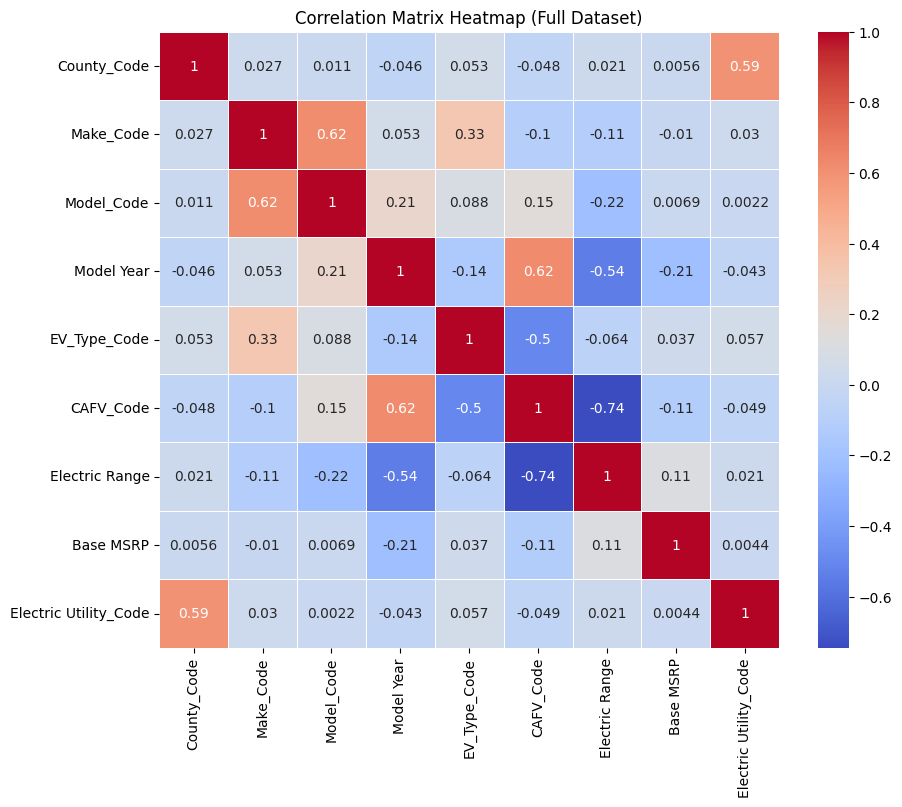

In [46]:
# Correlation matrix, full dataset
correlation_matrix_full = df_clean[['County_Code',
                               'Make_Code',
                               'Model_Code',
                               'Model Year',
                               'EV_Type_Code',
                               'CAFV_Code',
                               'Electric Range',
                               'Base MSRP',
                               'Electric Utility_Code']].corr()
print("\nCorrelation Matrix (Full Dataset)")
print(correlation_matrix_full)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Full Dataset)')
plt.show()

**Non-zero Base MSRP (Outliers Removed)**

The correlation matrix reveals strong positive relationships between:
- make vs. model
- model year vs. electric range
- model year vs. EV type
- EV type vs. CAFV eligibility
- EV type vs. electric range
- CAFV eligibility vs. electric range

*Note: Categorical variables were numerically encoded for correlation analysis; relationships should be interpreted directionally rather than causally.*


Correlation Matrix (Non Zero MSRP, Outliers Removed)
                       County_Code  Make_Code  Model_Code  Model Year  \
County_Code                   1.00      -0.01        0.01        0.01   
Make_Code                    -0.01       1.00        0.85        0.63   
Model_Code                    0.01       0.85        1.00        0.54   
Model Year                    0.01       0.63        0.54        1.00   
EV_Type_Code                  0.02       0.74        0.79        0.80   
CAFV_Code                     0.00       0.65        0.79        0.73   
Electric Range               -0.01      -0.67       -0.66       -0.94   
Base MSRP                     0.01      -0.31       -0.15       -0.65   
Electric Utility_Code         0.57       0.00       -0.00       -0.00   

                       EV_Type_Code  CAFV_Code  Electric Range  Base MSRP  \
County_Code                    0.02       0.00           -0.01       0.01   
Make_Code                      0.74       0.65           -0.6

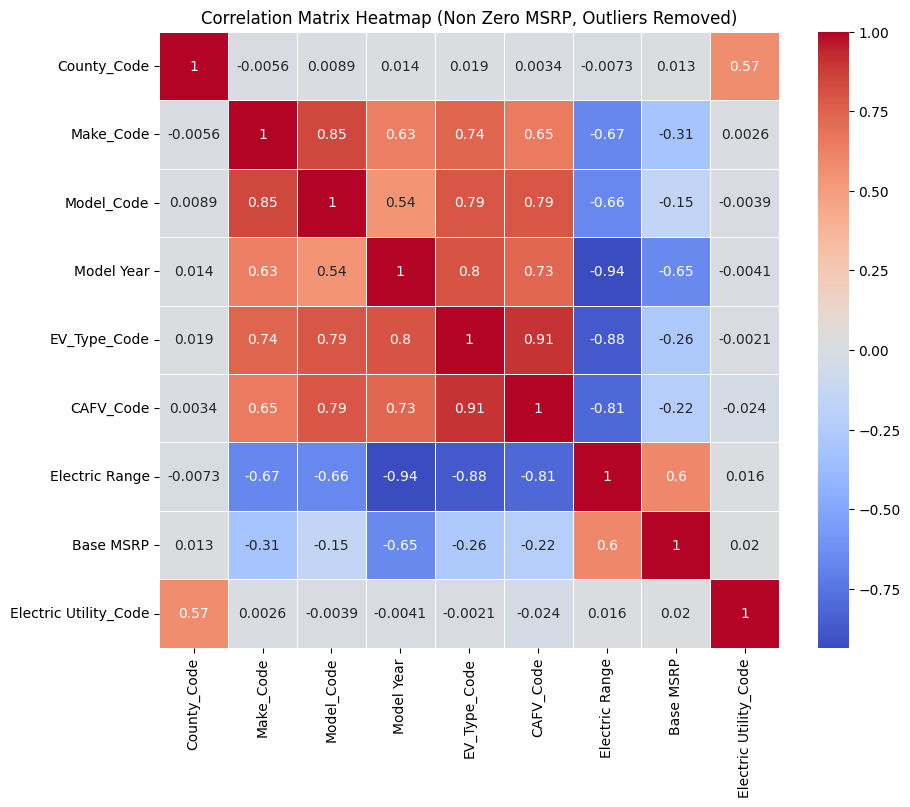

In [47]:
# Correlation matrix (non-zero, outliers removed)
correlation_matrix_clean = df_MSRP_no_outliers[['County_Code',
                               'Make_Code',
                               'Model_Code',
                               'Model Year',
                               'EV_Type_Code',
                               'CAFV_Code',
                               'Electric Range',
                               'Base MSRP',
                               'Electric Utility_Code']].corr()
print("\nCorrelation Matrix (Non Zero MSRP, Outliers Removed)")
print(correlation_matrix_clean)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_clean, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Non Zero MSRP, Outliers Removed)')
plt.show()

## 2. Relationships Between Variables

This section analyzes pairwise relationships among key variables to address the research questions and uncover patterns in electric vehicle adoption.

### 2.1. Electric Vehicle Type vs. Location (County, City)

This subsection examines the relationship between electric vehicle (EV) type and geographic location at the county and city levels. The analysis focuses on the distribution of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across Washington State to answer the following research question:

#### **What is the distribution of electric vehicle types (BEV vs. PHEV) across the state?**

- Across the full dataset, BEVs account for approximately 80% of registered electric vehicles, while PHEVs comprise the remaining 20%, indicating that **fully electric vehicles dominate EV adoption statewide**.

In [48]:
# EV type distribution across the full dataset
ev_type_summary = (
    df_clean['Electric Vehicle Type']
    .value_counts()
    .to_frame(name='Count')
    .assign(Percentage=lambda x: x / x.sum() * 100)
    .round(2)
)

ev_type_summary

,Count,Percentage
Electric Vehicle Type,,
Battery Electric Vehicle (BEV),210575,79.57
Plug-in Hybrid Electric Vehicle (PHEV),54053,20.43


<Figure size 1200x600 with 0 Axes>

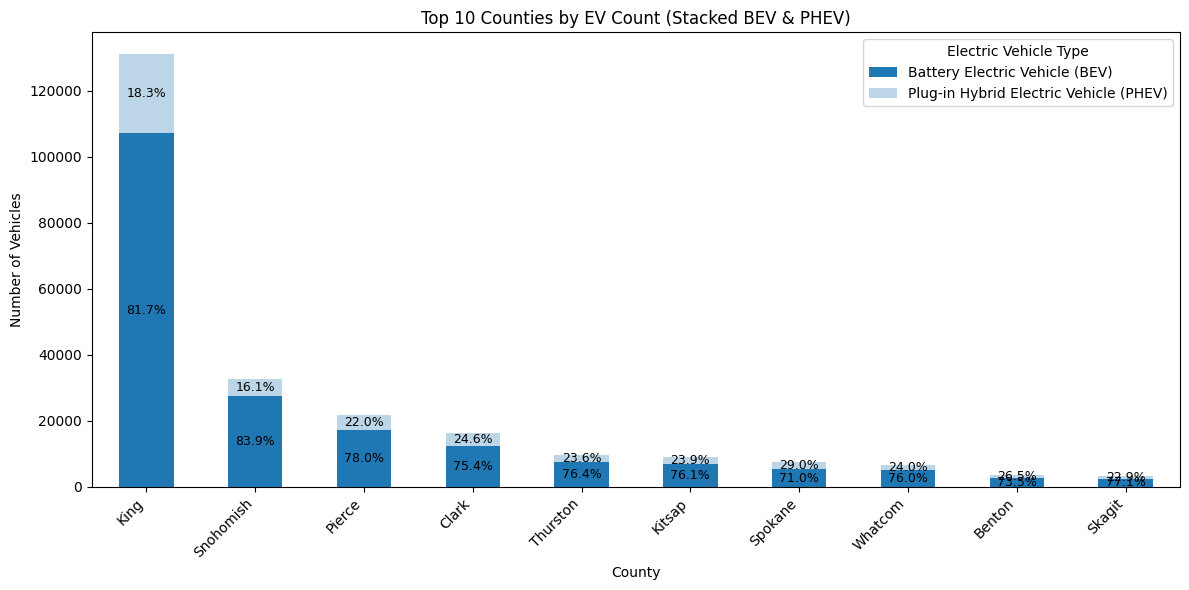

In [49]:
# Count EV types per county → rows = counties, columns = BEV/PHEV
county_counts = df_clean.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Get top 10 counties by total EV count
county_top10 = county_counts.sum(axis=1).sort_values(ascending=False).head(10)
county_top10_counts = county_counts.loc[county_top10.index]

# Set the size for the plot
plt.figure(figsize=(12, 6))

# Bar chart
ax = county_top10_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[base_color, lighten(base_color, amount=0.7)]
)

# Add percentage labels
for i, county in enumerate(county_top10_counts.index):
    total = county_top10_counts.loc[county].sum()
    bottom = 0

    for ev_type in county_top10_counts.columns:
        value = county_top10_counts.loc[county, ev_type]
        pct = value / total

        # Only label if segment is > 3% to avoid clutter
        if pct > 0.03:
            ax.text(
                i,                      # x position
                bottom + value/2,       # y position (middle of segment)
                f"{pct*100:.1f}%",      # percentage text
                ha='center', va='center',
                color='black', fontsize=9
            )

        bottom += value

# Set label for the plot
plt.xlabel("County")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Counties by EV Count (Stacked BEV & PHEV)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Electric Vehicle Type")
plt.tight_layout()

plt.show()

- The distribution of electric vehicle types is consistent across the top 10 counties with the highest numbers of registered EVs, with approximately 80% Battery Electric Vehicles (BEVs) and 20% Plug-in Hybrid Electric Vehicles (PHEVs). **King County has the highest number of registered EVs, followed by Snohomish and Pierce counties**.

- EV registrations in King County are approximately four times higher than in Snohomish County and six times higher than in Pierce County, indicating a **strong concentration of EV adoption in King County.**

- This concentration aligns with the counties’ **highly urbanized status within the Seattle metropolitan area**, where higher population density, higher income levels, and more developed charging infrastructure create favorable conditions for EV adoption.

<Figure size 1200x600 with 0 Axes>

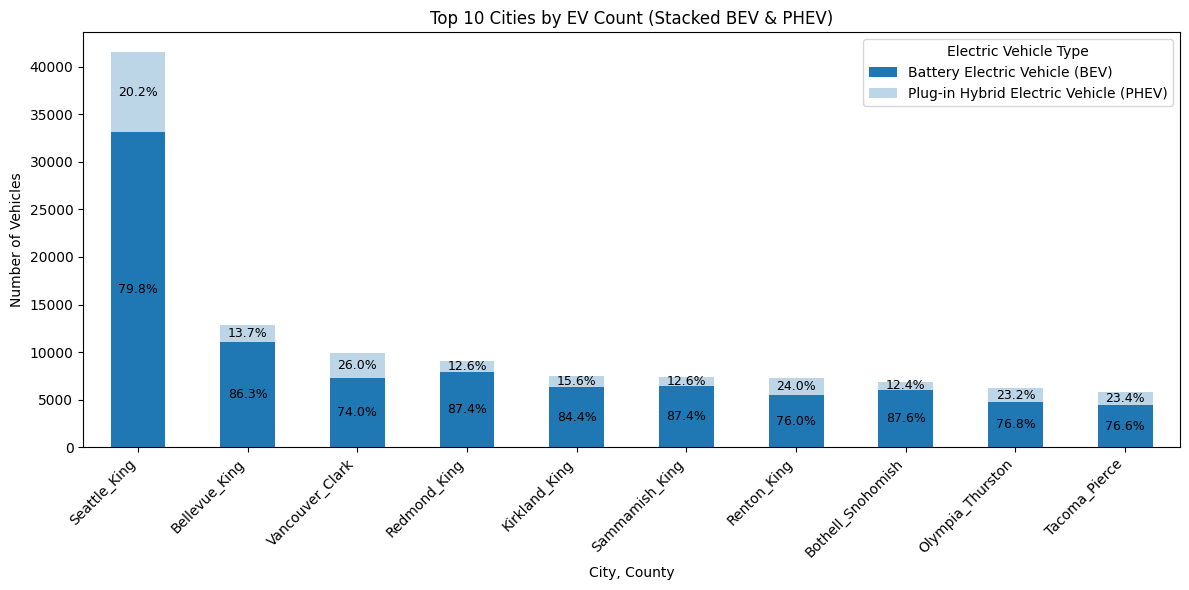

In [50]:
# Count EV types per county → rows = counties, columns = BEV/PHEV
city_counts = df_clean.groupby(['City_County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Get top 10 counties by total EV count
city_top10 = city_counts.sum(axis=1).sort_values(ascending=False).head(10)
city_top10_counts = city_counts.loc[city_top10.index]

# Set the size for the plot
plt.figure(figsize=(12, 6))

# Draw the bar chart
ax = city_top10_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[base_color, lighten(base_color, amount=0.7)]
)

# Add percentage labels
for i, city in enumerate(city_top10_counts.index):
    total = city_top10_counts.loc[city].sum()
    bottom = 0

    for ev_type in city_top10_counts.columns:
        value = city_top10_counts.loc[city, ev_type]
        pct = value / total

        # Label only if > 3% (remove this condition if you want ALL labels)
        if pct > 0.03:
            ax.text(
                i,                        # x position
                bottom + value / 2,       # y position (middle of bar segment)
                f"{pct*100:.1f}%",        # percentage text
                ha='center', va='center',
                fontsize=9, color='black'
            )

        bottom += value

# Set labels for the chart
plt.xlabel("City, County")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Cities by EV Count (Stacked BEV & PHEV)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Electric Vehicle Type")
plt.tight_layout()

plt.show()

- At the city level, **Seattle has the highest number of EV registrations**, followed by Bellevue and Vancouver.

- **The sizable gap between Seattle and the remaining cities highlights Seattle’s dominant role in EV adoption**, reflecting its status as a dense urban and economic center with more developed EV infrastructure and higher adoption rates.

### 2.2. Electric Vehicle Type vs. Make, Model

This section examines the relationship between electric vehicle type and manufacturer make and model to identify dominant players in the EV market and explore how adoption patterns differ across geographic regions.

#### **Which manufacturers and models dominate the EV market?**

In [51]:
# Top 15 manufacturer counts
top_makes = df_clean['Make'].value_counts().head(15)

# Top 15 EV model counts
top_models = df_clean['Model_Make'].value_counts().head(15)

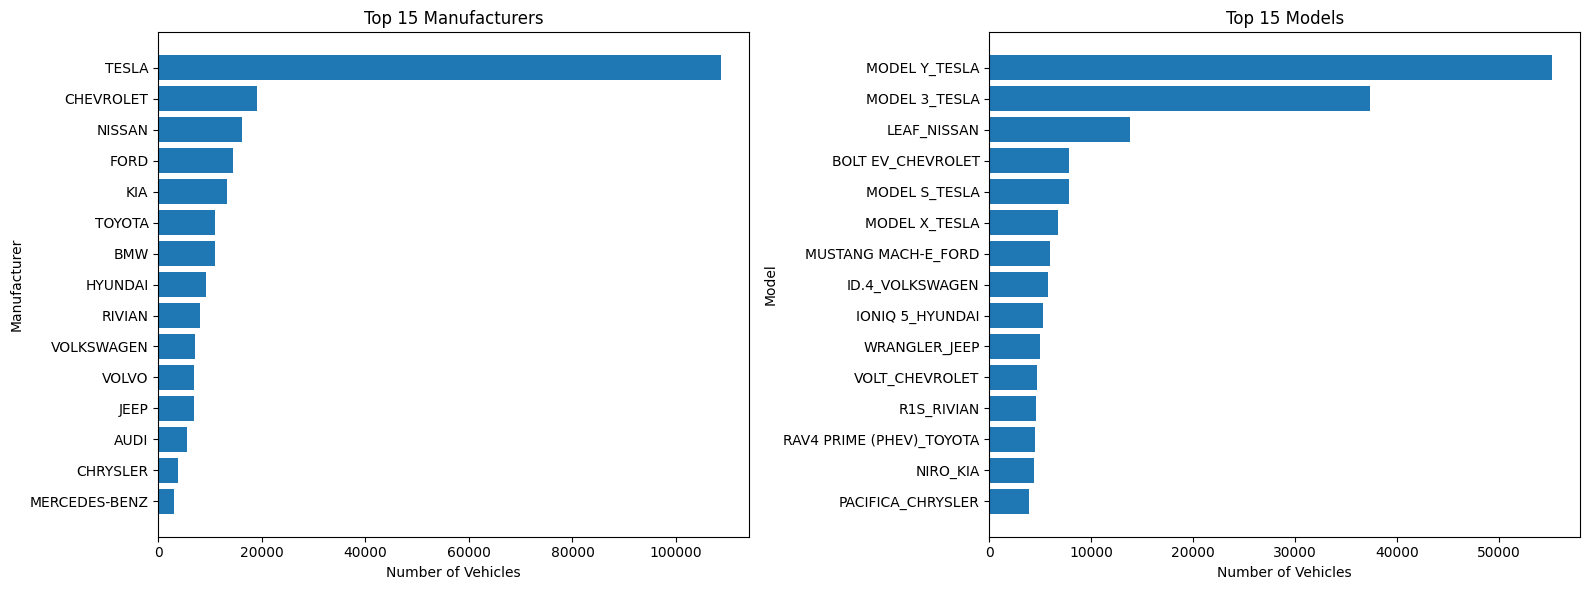

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 manufacturer chart
axes[0].barh(
    top_makes.index,
    top_makes.values
)
axes[0].set_title("Top 15 Manufacturers")
axes[0].set_xlabel("Number of Vehicles")
axes[0].set_ylabel("Manufacturer")
axes[0].invert_yaxis()  # largest on top

# Top 15 model chart
axes[1].barh(
    top_models.index,
    top_models.values
)
axes[1].set_title("Top 15 Models")
axes[1].set_xlabel("Number of Vehicles")
axes[1].set_ylabel("Model")
axes[1].invert_yaxis()  # largest on top

plt.tight_layout()
plt.show()

- The manufacturer and model distributions show a strong concentration in Tesla vehicles. Tesla dominates the EV market by a wide margin among manufacturers, far exceeding other brands.

- At the model level, the Tesla Model Y and Model 3 are the most registered EVs, followed by a significant drop to non-Tesla models such as the Nissan Leaf and Chevrolet Bolt. This pattern highlights Tesla’s leading position in both overall market share and individual model popularity.

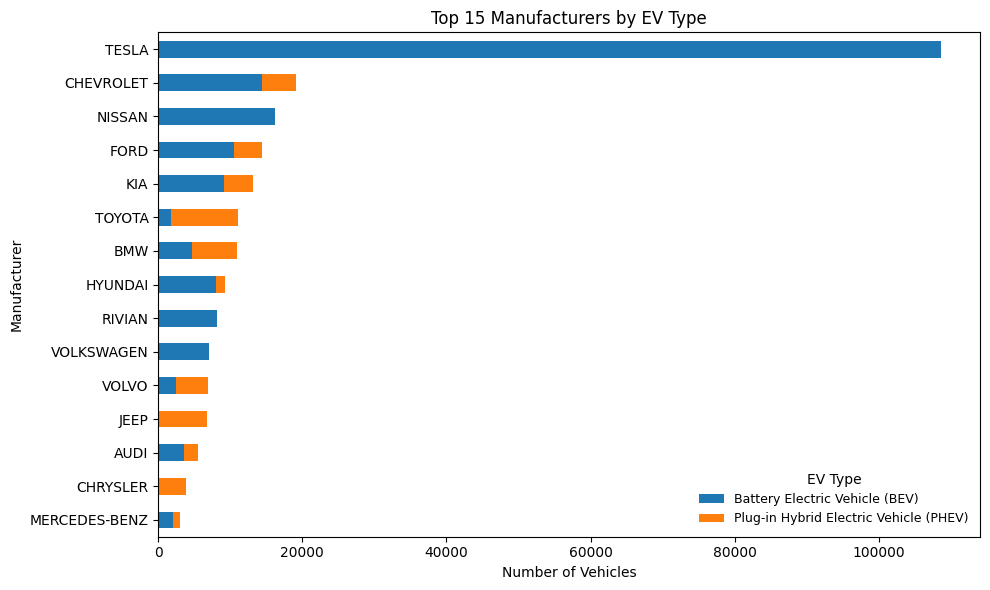

In [53]:
# Prepare stacked data
top_make_stack = (
    df[df['Make'].isin(top_makes.index)]
    .groupby(['Make', 'Electric Vehicle Type'])
    .size()
    .unstack(fill_value=0)
    .loc[top_makes.index]
)

# Stacked bar chart
ax = top_make_stack.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6)
)

# Show the largest on top
ax.invert_yaxis()

# Set plot labels
plt.title("Top 15 Manufacturers by EV Type")
plt.xlabel("Number of Vehicles")
plt.ylabel("Manufacturer")
plt.legend(
    title="EV Type",
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

- The distribution of EV types by manufacturer shows that Tesla overwhelmingly dominates the Battery Electric Vehicle (BEV) market, with registrations far exceeding those of all other manufacturers and virtually no presence in the Plug-in Hybrid Electric Vehicle (PHEV) segment.

- In contrast, traditional automakers such as Toyota, Ford, Chevrolet, Kia, and BMW exhibit a more mixed portfolio, with notable contributions from both BEVs and PHEVs.

➭ This pattern highlights Tesla’s strong specialization in fully electric vehicles, while other manufacturers continue to balance their EV offerings between BEV and PHEV technologies.

#### **How do these patterns vary geographically?**

In [54]:
# Filter top 10 counties
df_top10counties = df_clean[df_clean["County"].isin(county_top10.index)].copy()

# Count by make, county use value_counts
df_top10counties_counts = df_top10counties[['County', 'Make']].value_counts()

# Count EV registrations by county and make
df_top10counties_counts = (
    df_top10counties[["County", "Make"]]
    .value_counts()
    .rename("Count")
)

# Sort by count (descending), then take top 5 makes within each county
top5makes_per_county = (
    df_top10counties_counts
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(5)
    .loc[county_top10.index]
)

# Pivot
top5makes_per_county = top5makes_per_county.unstack(fill_value=0)

# Sort cities by total vehicles (descending)
top5makes_per_county = top5makes_per_county.loc[top5makes_per_county
                                                .sum(axis=1)
                                                .sort_values(ascending=False)
                                                .index]

top5makes_per_county

Make,TESLA,CHEVROLET,NISSAN,BMW,KIA,FORD,TOYOTA,JEEP,RIVIAN
County,,,,,,,,,
King,57202,7693,7663,6406,5841,0,0,0,0
Snohomish,15620,2003,2098,0,1529,1778,0,0,0
Pierce,8541,1686,1300,0,1468,1506,0,0,0
Clark,6437,1186,881,0,0,919,1206,0,0
Thurston,3019,1241,638,0,664,942,0,0,0
Kitsap,2671,838,742,0,596,573,0,0,0
Spokane,2653,546,0,0,427,577,0,395,0
Whatcom,1854,626,732,0,409,0,424,0,0
Benton,1569,294,0,159,0,288,232,0,0


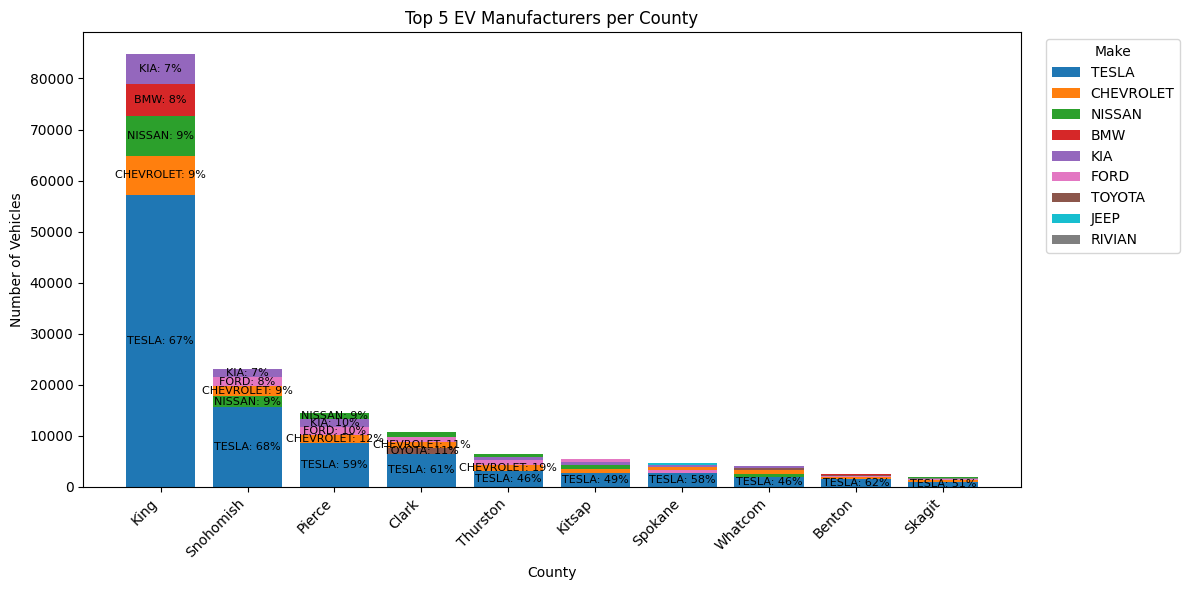

In [55]:
# Set make colors
make_colors = {
    "TESLA": "#1f77b4",       # blue
    "CHEVROLET": "#ff7f0e",   # orange
    "NISSAN": "#2ca02c",      # green
    "BMW": "#d62728",         # red
    "KIA": "#9467bd",         # purple
    "TOYOTA": "#8c564b",
    "FORD": "#e377c2",
    "RIVIAN": "#7f7f7f",
    "JEEP": "#17becf"
}

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Column indexes
x = np.arange(len(top5makes_per_county.index))

# To calculate the percentage labels
total_per_county = top5makes_per_county.sum(axis=1)

labeled_makes = set()

# Filter only non-zero column values
for i, county in enumerate(top5makes_per_county.index):
    county_vals = (
        top5makes_per_county.loc[county]
        .where(top5makes_per_county.loc[county] > 0)
        .dropna()
        .sort_values(ascending=False)
    )

    # Initialize the baseline for the stacked chart
    bottom = 0

    # Plot the stacked bar chart
    for make, v in county_vals.items():
        ax.bar(
            i,
            v,
            bottom=bottom,
            color=make_colors.get(make, "gray"),
            label=make if make not in labeled_makes else ""
        )
        labeled_makes.add(make)

        # Caculate percentage label
        pct = v / total_per_county.loc[county]
        if v > 1000:
            ax.text(
                i,
                bottom + v / 2,
                f"{make}: {pct*100:.0f}%",
                ha="center",
                va="center",
                fontsize=8,
                color="black"
            )

        bottom += v

# Label, title, legend
ax.set_xticks(x)
ax.set_xticklabels(top5makes_per_county.index, rotation=45, ha="right")
ax.set_xlabel("County")
ax.set_ylabel("Number of Vehicles")
ax.set_title("Top 5 EV Manufacturers per County")

ax.legend(title="Make", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

- Tesla leads EV registrations in every top county, with King County showing a particularly strong concentration of adoption and Tesla comprising the majority of EVs. While Snohomish and Pierce counties also show high adoption, their total counts are substantially lower, and smaller counties exhibit more balanced manufacturer distributions.

In [56]:
# Filter top 10 counties
df_top10cities = df_clean[df_clean["City_County"].isin(city_top10.index)].copy()

# Count by make, county use value_counts
df_top10cities_counts = df_top10cities[['City_County', 'Make']].value_counts()

# Count EV registrations by county and make
df_top10cities_counts = (
    df_top10cities[["City_County", "Make"]]
    .value_counts()
    .rename("Count")
)

# Sort by count (descending), then take top 5 makes within each county
top5makes_per_city = (
    df_top10cities_counts
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(5)
    .loc[city_top10.index]
)

# Pivot
top5makes_per_city = top5makes_per_city.unstack(fill_value=0)

# Sort cities by total vehicles (descending)
top5makes_per_city = top5makes_per_city.loc[top5makes_per_city
                                            .sum(axis=1)
                                            .sort_values(ascending=False)
                                            .index]

top5makes_per_city

Make,TESLA,CHEVROLET,NISSAN,BMW,KIA,TOYOTA,FORD,RIVIAN,CHRYSLER,JEEP
City_County,,,,,,,,,,
Seattle_King,13770,3220,3071,2247,2228,0,0,0,0,0
Bellevue_King,7232,462,627,726,359,0,0,0,0,0
Redmond_King,5014,325,550,430,0,0,331,0,0,0
Vancouver_Clark,3712,794,587,0,541,800,0,0,0,0
Sammamish_King,4269,0,325,447,0,0,216,283,0,0
Kirkland_King,3659,314,337,469,0,0,0,319,0,0
Bothell_Snohomish,3928,248,349,309,263,0,0,0,0,0
Renton_King,3369,340,346,0,0,0,0,0,502,361
Olympia_Thurston,1861,824,437,0,413,0,592,0,0,0


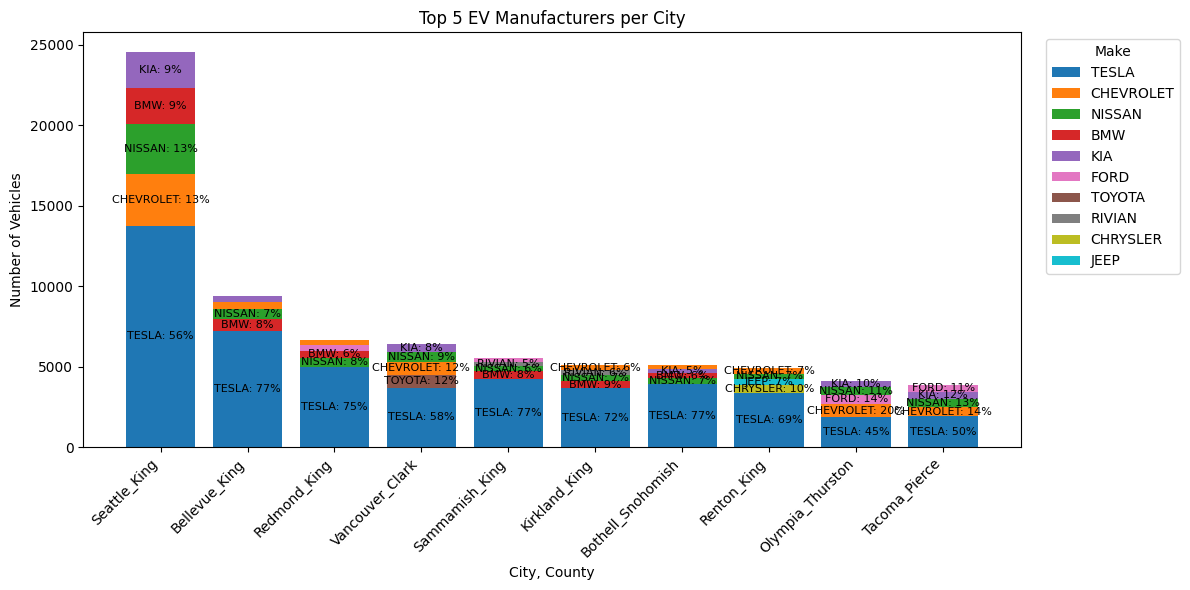

In [57]:
# Set make colors
make_colors = {
    "TESLA": "#1f77b4",       # blue
    "CHEVROLET": "#ff7f0e",   # orange
    "NISSAN": "#2ca02c",      # green
    "BMW": "#d62728",         # red
    "KIA": "#9467bd",         # purple
    "TOYOTA": "#8c564b",
    "FORD": "#e377c2",
    "RIVIAN": "#7f7f7f",
    "CHRYSLER": "#bcbd22",
    "JEEP": "#17becf"
}

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Column indexes
x = np.arange(len(top5makes_per_city.index))

# To calculate the percentage labels
total_per_city = top5makes_per_city.sum(axis=1)

labeled_makes = set()

# Filter only non-zero column values
for i, city in enumerate(top5makes_per_city.index):
    city_vals = (
        top5makes_per_city.loc[city]
        .where(top5makes_per_city.loc[city] > 0)
        .dropna()
        .sort_values(ascending=False)
    )

    # Initialize the baseline for the stacked chart
    bottom = 0

    # Plot the stacked bar chart
    for make, v in city_vals.items():
        ax.bar(
            i,
            v,
            bottom=bottom,
            color=make_colors.get(make, "gray"),
            label=make if make not in labeled_makes else ""
        )
        labeled_makes.add(make)

        # Caculate percentage label
        pct = v / total_per_city.loc[city]
        if pct > 0.05:
            ax.text(
                i,
                bottom + v / 2,
                f"{make}: {pct*100:.0f}%",
                ha="center",
                va="center",
                fontsize=8,
                color="black"
            )

        bottom += v

# Label, title, legend
ax.set_xticks(x)
ax.set_xticklabels(top5makes_per_city.index, rotation=45, ha="right")
ax.set_xlabel("City, County")
ax.set_ylabel("Number of Vehicles")
ax.set_title("Top 5 EV Manufacturers per City")

ax.legend(title="Make", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


- Tesla dominates EV registrations across all top cities, with especially strong concentration in Seattle and surrounding suburban cities where it accounts for over 70% of EVs. Smaller cities such as Olympia and Tacoma show a more balanced distribution across manufacturers, reflecting greater market diversity.

### 2.3. Model Year vs. Electric Vehicle Type, Location

This section analyzes temporal trends in EV adoption by model year and vehicle type, while also examining how electric range has evolved across different EV technologies.

#### **How has overall electric vehicle adoption changed across model years over time?**

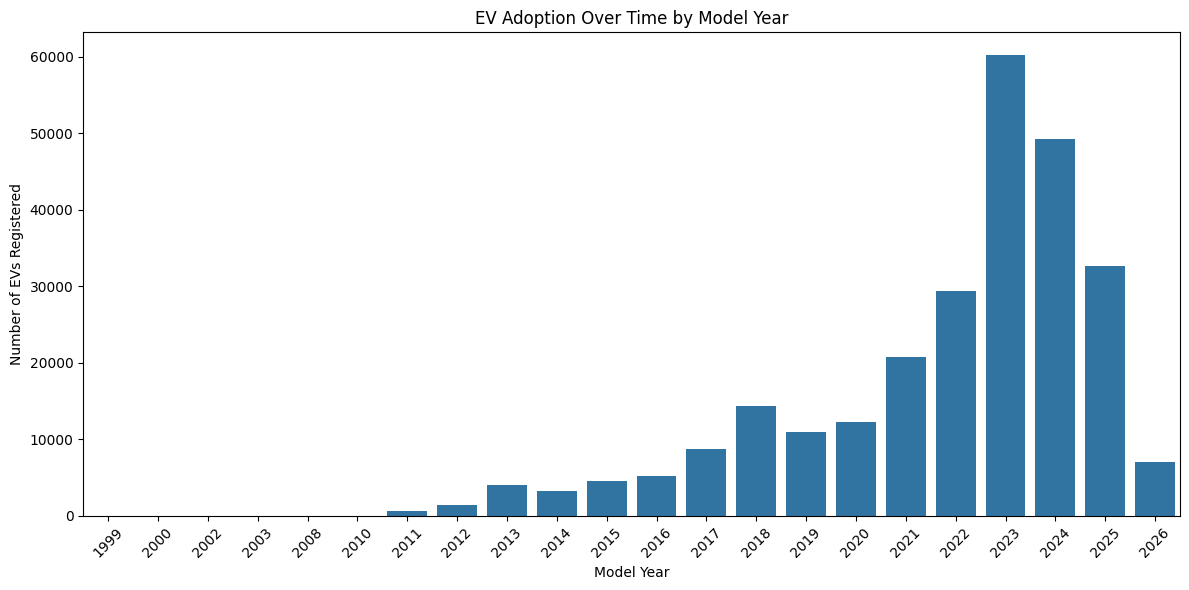

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='Model Year', color="#1f77b4")

plt.title("EV Adoption Over Time by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Electric vehicle adoption has increased sharply over time, with relatively low registrations prior to 2015 followed by rapid growth beginning around 2017. This upward trend accelerates significantly after 2020, reaching a peak in the 2023 model year.

- A noticeable decline is observed for the 2024 and 2025 model years; however, this may indicate either a genuine slowdown in EV adoption after 2023 or reflect incomplete registration data for newer vehicles.

#### **Which areas show the fastest growth in EV registrations over time?**

/tmp/ipython-input-1455269864.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  growth = df_clean.groupby(['Model Year', 'City_County']).size().reset_index(name='Count')


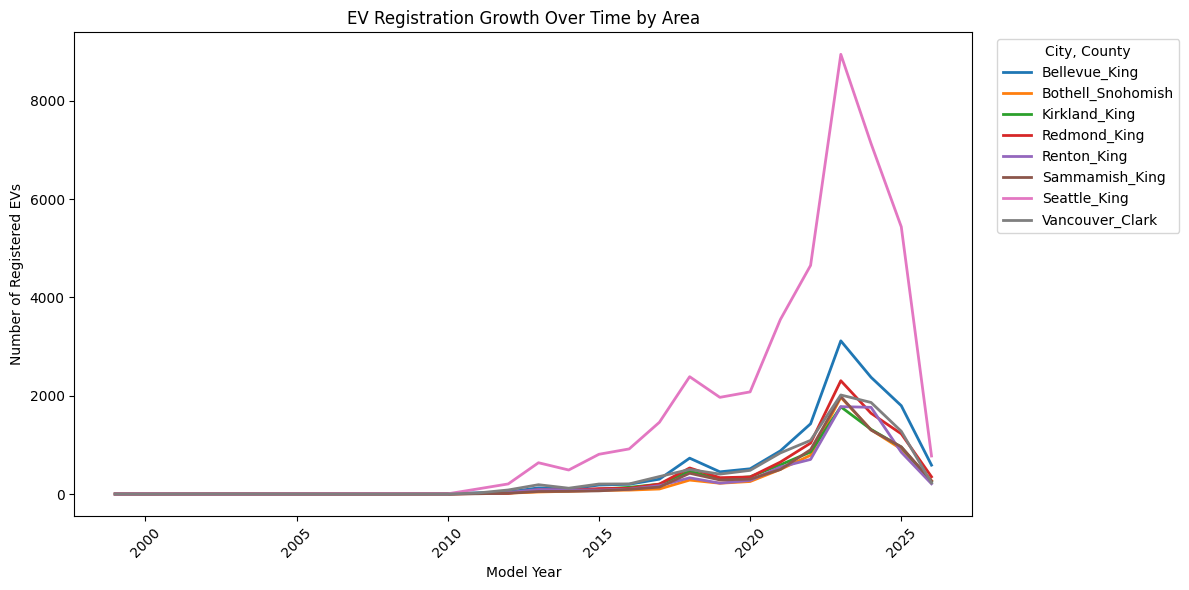

In [59]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Aggregate EV registrations by model year and city/county
growth = df_clean.groupby(['Model Year', 'City_County']).size().reset_index(name='Count')

# Select the top 8 areas with the highest total EV registrations
top_areas = df_clean['City_County'].value_counts().head(8).index

# Filter the aggregated data to include only the top 8 areas
growth_top = growth[growth['City_County'].isin(top_areas)]

# Plot EV registration growth over time for each selected area
sns.lineplot(
    data=growth_top,
    x='Model Year',
    y='Count',
    hue='City_County',
    linewidth=2
)

# Customize plot labels and title
plt.title("EV Registration Growth Over Time by Area")
plt.xlabel("Model Year")
plt.ylabel("Number of Registered EVs")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Place the legend outside the plot area
plt.legend(title="City, County", bbox_to_anchor=(1.02, 1), loc="upper left")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- EV adoption grows rapidly across all top cities after 2017, with Seattle–King County standing out as the dominant market. Other suburban cities in the Seattle metro area follow similar but smaller growth patterns. The recent decline likely reflects incomplete data for newer model years.

#### **How do adoption trends differ between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across model years?**

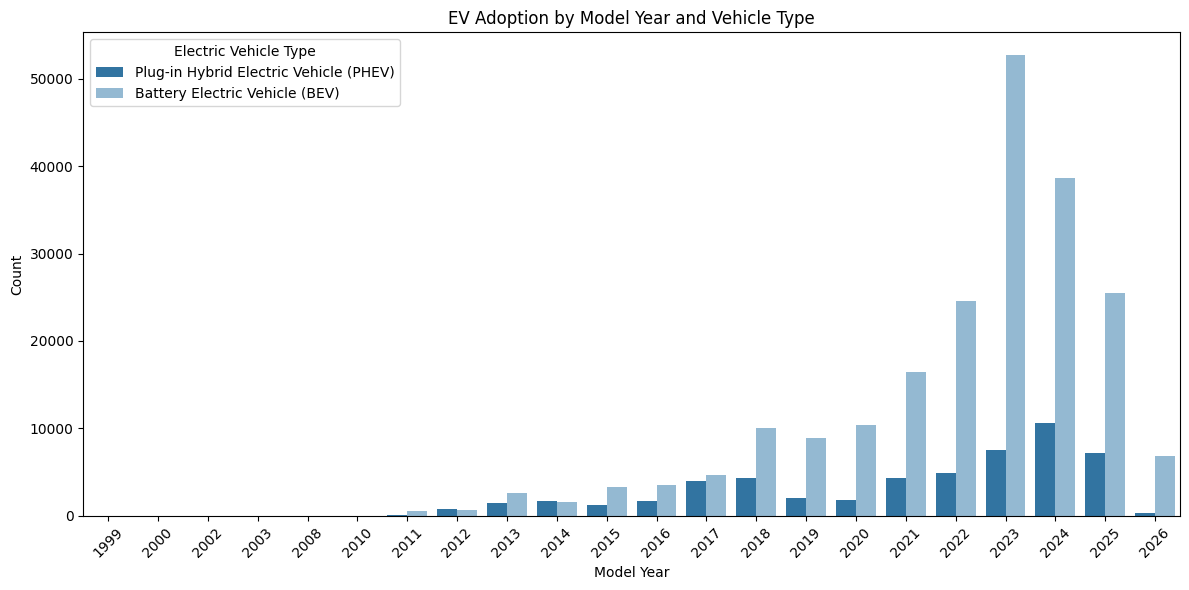

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_clean,
    x='Model Year',
    hue='Electric Vehicle Type',
    palette=["#1f77b4", "#8abbdc"]
)

plt.title("EV Adoption by Model Year and Vehicle Type")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Both BEVs and PHEVs show increasing adoption over time; however, BEVs grow at a much faster pace and dominate EV registrations after 2017.

- The gap between BEVs and PHEVs widens significantly after 2020, highlighting a shift toward fully electric vehicles.

#### **How has electric range evolved over time across different vehicle types?**

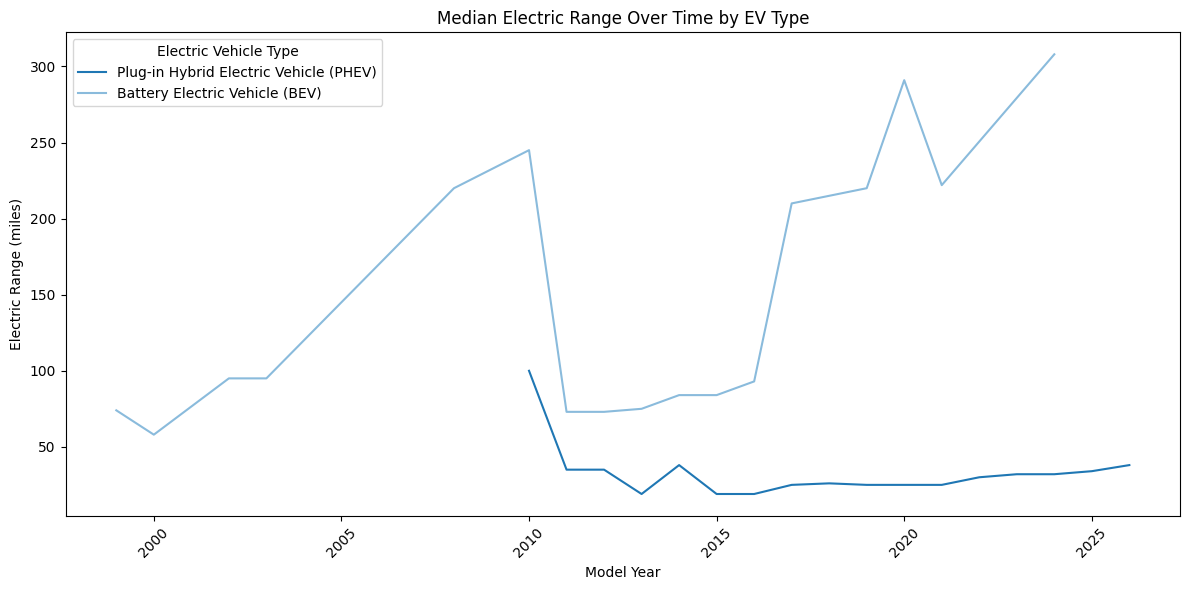

In [61]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_non_zero_ER,
    x='Model Year',
    y='Electric Range',
    hue='Electric Vehicle Type',
    estimator='median',
    errorbar=None,
    palette=["#1f77b4", "#8abbdc"]
)

plt.title("Median Electric Range Over Time by EV Type")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- BEVs show a strong upward trend in median electric range over time, far surpassing PHEVs, whose electric range remains relatively stable and limited.

- This growing performance gap underscores continued improvements in BEV battery technology and supports the increasing preference for fully electric vehicles.

### 2.4 Base MSRP vs. Electric Range

#### **What relationship, if any, exists between base MSRP and electric range performance?**

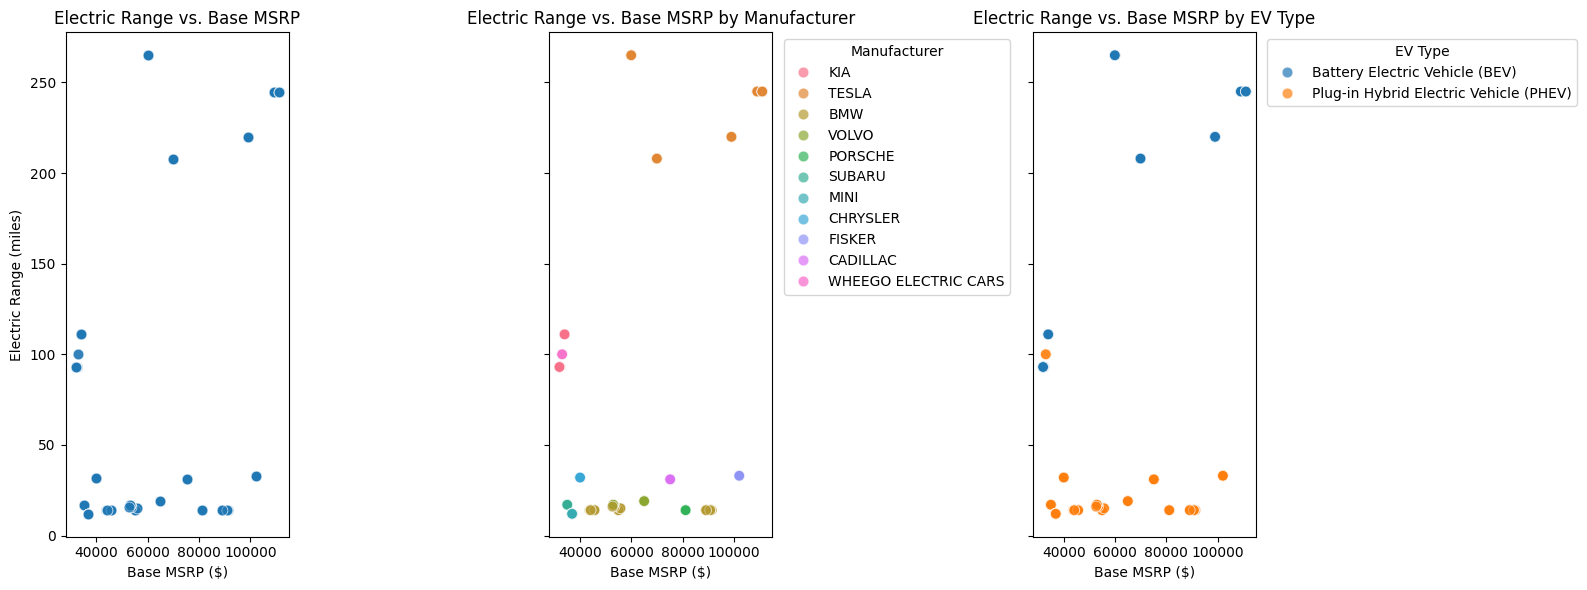

In [62]:
# Set the plot size
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

#
sns.scatterplot(
    data=df_MSRP_no_outliers,
    x='Base MSRP',
    y='Electric Range',
    alpha=0.7,
    s=60,
    ax=axes[0]
)

axes[0].set_title("Electric Range vs. Base MSRP")
axes[0].set_xlabel("Base MSRP ($)")
axes[0].set_ylabel("Electric Range (miles)")

sns.scatterplot(
    data=df_MSRP_no_outliers,
    x='Base MSRP',
    y='Electric Range',
    hue='Make',
    alpha=0.7,
    s=60,
    ax=axes[1]
)

axes[1].set_title("Electric Range vs. Base MSRP by Manufacturer")
axes[1].set_xlabel("Base MSRP ($)")
axes[1].legend(title="Manufacturer", bbox_to_anchor=(1.02, 1), loc="upper left")

sns.scatterplot(
    data=df_MSRP_no_outliers,
    x='Base MSRP',
    y='Electric Range',
    hue='Electric Vehicle Type',
    alpha=0.7,
    s=60,
    ax=axes[2]
)

axes[2].set_title("Electric Range vs. Base MSRP by EV Type")
axes[2].set_xlabel("Base MSRP ($)")
axes[2].legend(title="EV Type", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


- Electric range generally increases with base MSRP, but the relationship is not strictly linear and varies widely across vehicle types and models.

- Battery Electric Vehicles (BEVs) dominate the higher end of electric range, especially at mid-to-high price points, while Plug-in Hybrid Electric Vehicles (PHEVs) remain clustered at much lower electric ranges regardless of price, reflecting fundamental design differences.

- Price is not driven by electric range alone—vehicles with similar ranges can have very different MSRPs, indicating that factors such as manufacturer, vehicle class, performance features, and interior quality also play a significant role.

#### **How do electric range and base MSRP vary across manufacturers?**

/tmp/ipython-input-1339183481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1339183481.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1339183481.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=phev, x='Make', y='Base MSRP', palette='Blues', ax=axes[2])
/tmp/ipython-input-1339183481.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

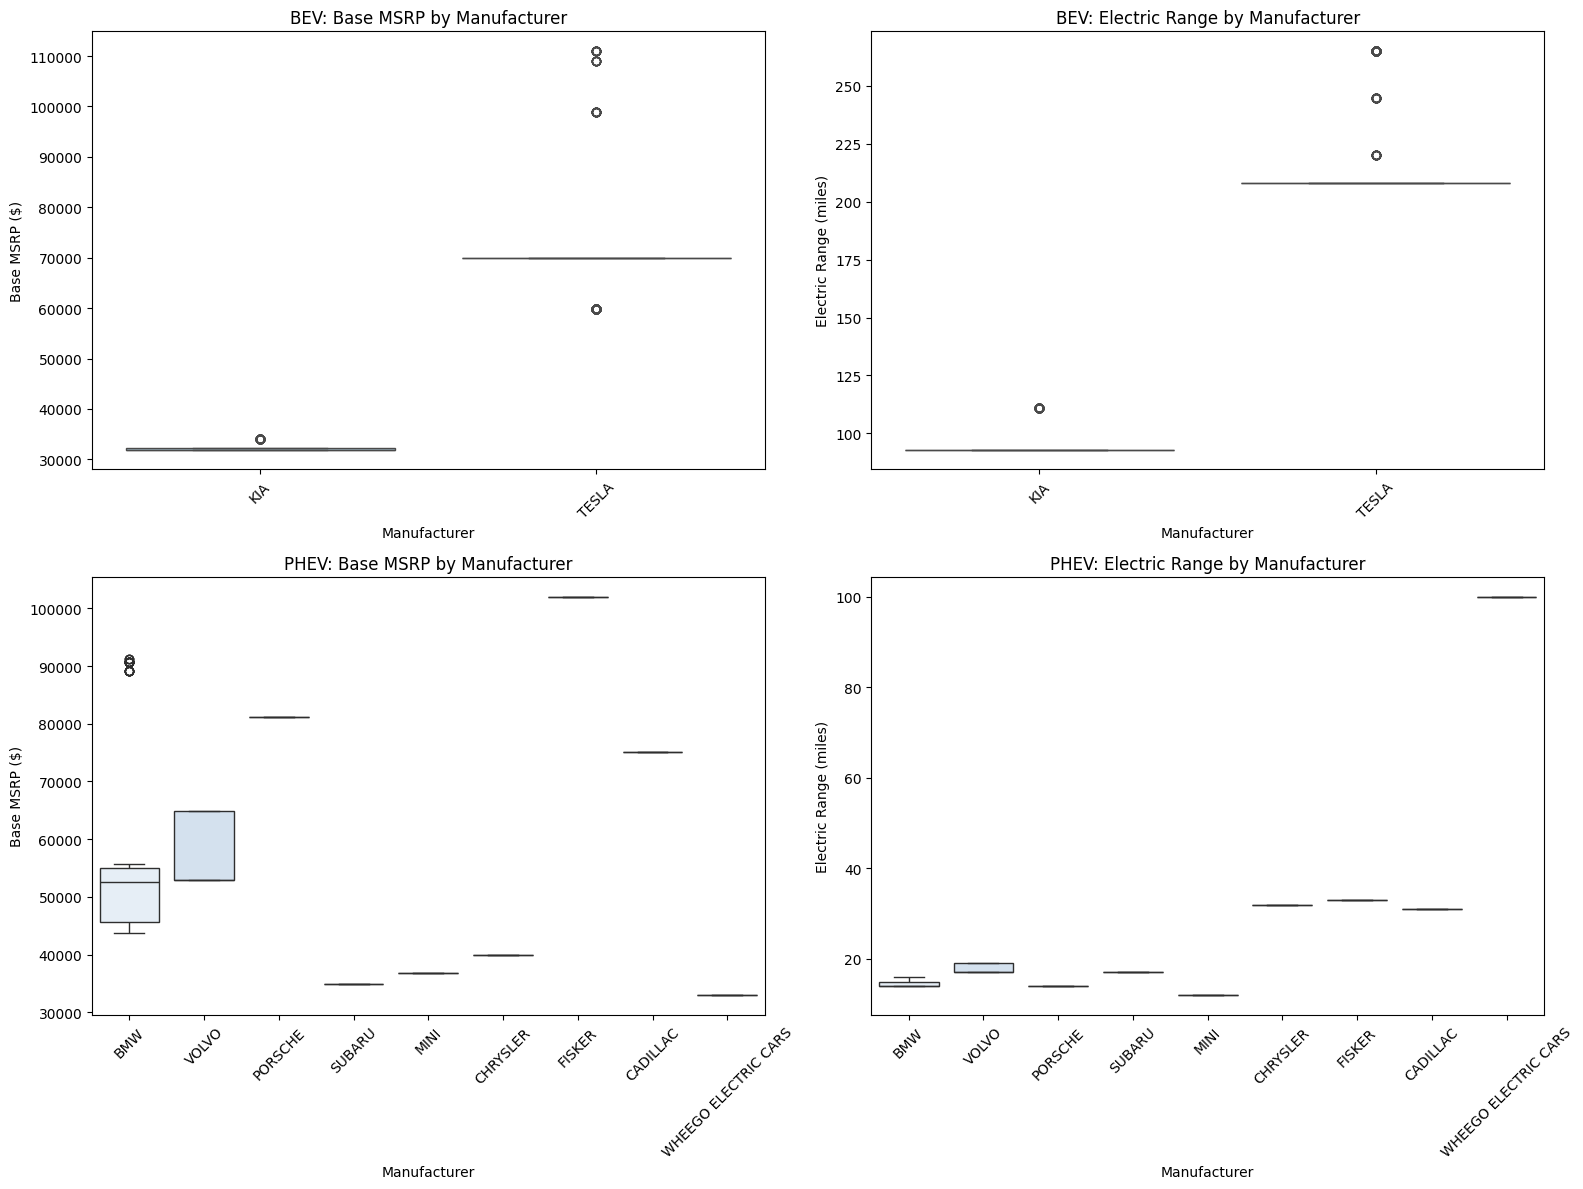

In [63]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# BEV subset
bev = df_MSRP_no_outliers[df_MSRP_no_outliers['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
# PHEV subset
phev = df_MSRP_no_outliers[df_MSRP_no_outliers['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Plot 1: Base MSRP by Manufacturer
sns.boxplot(
    data=bev,
    x='Make',
    y='Base MSRP',
    palette='Blues',
    ax=axes[0]
)

axes[0].set_title("BEV: Base MSRP by Manufacturer")
axes[0].set_xlabel("Manufacturer")
axes[0].set_ylabel("Base MSRP ($)")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Electric Range by Manufacturer
sns.boxplot(
    data=bev,
    x='Make',
    y='Electric Range',
    palette='Blues',
    ax=axes[1]
)

axes[1].set_title("BEV: Electric Range by Manufacturer")
axes[1].set_xlabel("Manufacturer")
axes[1].set_ylabel("Electric Range (miles)")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: PHEV MSRP
sns.boxplot(data=phev, x='Make', y='Base MSRP', palette='Blues', ax=axes[2])
axes[2].set_title("PHEV: Base MSRP by Manufacturer")
axes[2].set_xlabel("Manufacturer")
axes[2].set_ylabel("Base MSRP ($)")
axes[2].tick_params(axis='x', rotation=45)

# Plot 4: PHEV Range
sns.boxplot(data=phev, x='Make', y='Electric Range', palette='Blues', ax=axes[3])
axes[3].set_title("PHEV: Electric Range by Manufacturer")
axes[3].set_xlabel("Manufacturer")
axes[3].set_ylabel("Electric Range (miles)")
axes[3].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

- Among BEVs, Tesla stands out with both a higher median base MSRP and substantially longer electric range compared to Kia, highlighting Tesla’s focus on premium, long-range electric performance. While BEV prices vary, higher electric range among BEVs is clearly concentrated within Tesla models rather than evenly distributed across manufacturers.

- For PHEVs, base MSRP varies widely across manufacturers, but electric range remains tightly clustered at relatively low levels (generally under 40 miles), regardless of price. This indicates that PHEV pricing is driven more by brand positioning and vehicle features than by electric-only range.

➭ Overall, the comparison reinforces a key distinction between EV types: BEV pricing and value are closely tied to battery performance and range, whereas PHEVs exhibit limited electric range by design, with MSRP influenced by non-battery factors.

#### **How has base MSRP evolved over model years for BEVs compared to PHEVs?**

- The scatter plot with trend lines indicates a downward relationship between base MSRP and model year for both BEVs and PHEVs, suggesting that electric vehicles have generally become more affordable over time.

- The decline is more pronounced for BEVs, reflecting rapid cost reductions driven by advances in battery technology, economies of scale, and increased market competition.

- In contrast, PHEVs show a more gradual decrease in MSRP, indicating slower price convergence.

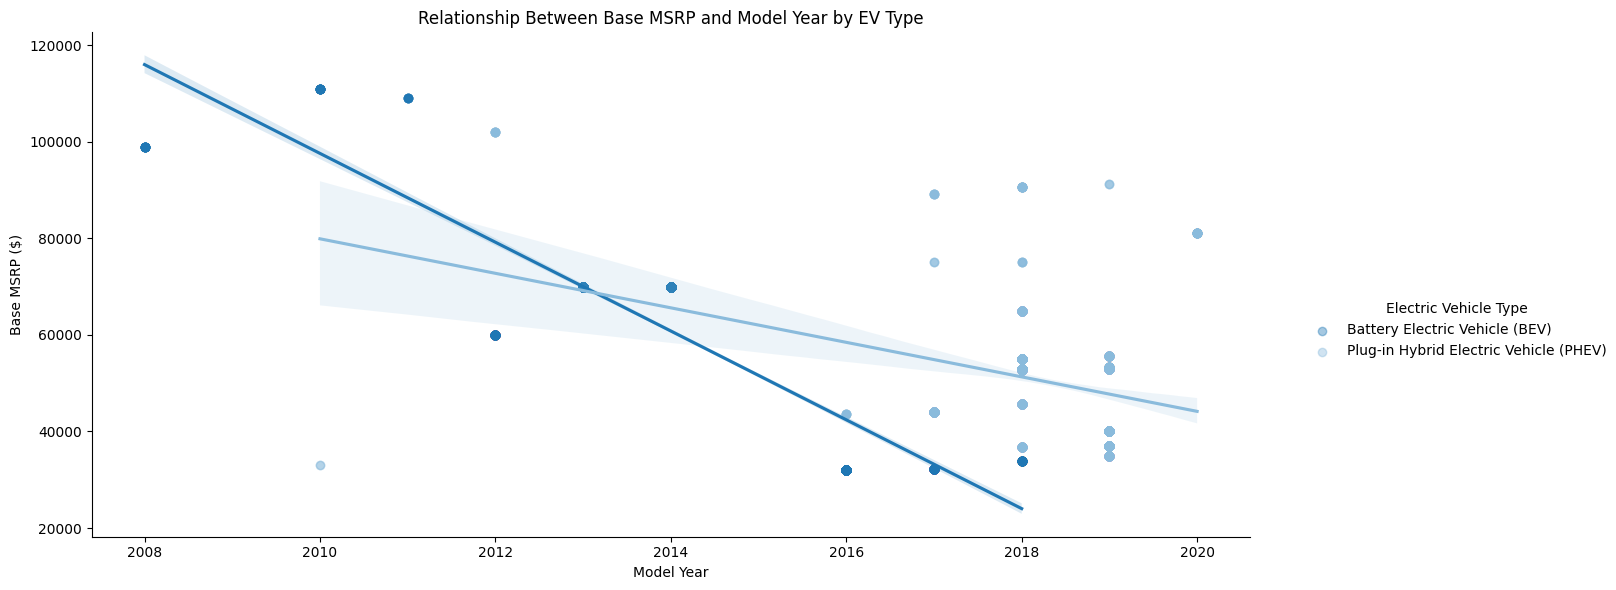

In [64]:
g = sns.lmplot(
    data=df_MSRP_no_outliers,
    x='Model Year',
    y='Base MSRP',
    hue='Electric Vehicle Type',
    palette=['#1f77b4', '#8abbdc'],
    height=6,
    aspect=1.6,
    scatter_kws={'alpha': 0.4}
)

g._legend.set_bbox_to_anchor((1.02, 0.5))
g._legend.set_loc("upper left")

plt.title("Relationship Between Base MSRP and Model Year by EV Type")
plt.xlabel("Model Year")
plt.ylabel("Base MSRP ($)")
plt.tight_layout()
plt.show()

### 2.5. Clean Alternative Fuel Vehicle (CAFV) Eligibility

This section examines the impact of Clean Alternative Fuel Vehicle (CAFV) eligibility on electric vehicle adoption, assessing whether policy incentives are associated with higher adoption rates and how they interact with electric range and manufacturer dominance.


>**EV incentives:**

Washington’s major EV incentives began in the mid-2010s (2015-2019), with a reinstated statewide sales tax exemption effective August 1, 2019, and expanded low-income rebate programs launching in 2024.

- Currently, EV buyers are eligible for a sales tax exemption on up to `$15,000` of a new vehicle’s price or `$16,000` of a leased vehicle’s price.

- In addition, low-income households can receive rebates of up to `$9,000` for new EVs and `$2,500` for used EVs (starting August 2024).

- Beyond financial incentives, EV owners also benefit from improved charging access and expanding statewide charging infrastructure.

Read the full Electricity Laws and Incentives in Washington at https://afdc.energy.gov/fuels/laws/ELEC?state=wa

>**Requirements for a CAFV-Eligible Vehicle**

- A vehicle is classified as CAFV-eligible if it operates on an approved clean fuel and meets state certification requirements.

- While BEVs consistently qualify, PHEV eligibility depends on achieving a sufficient electric-only driving range (> 30 miles), creating a strong relationship between electric range and CAFV status.

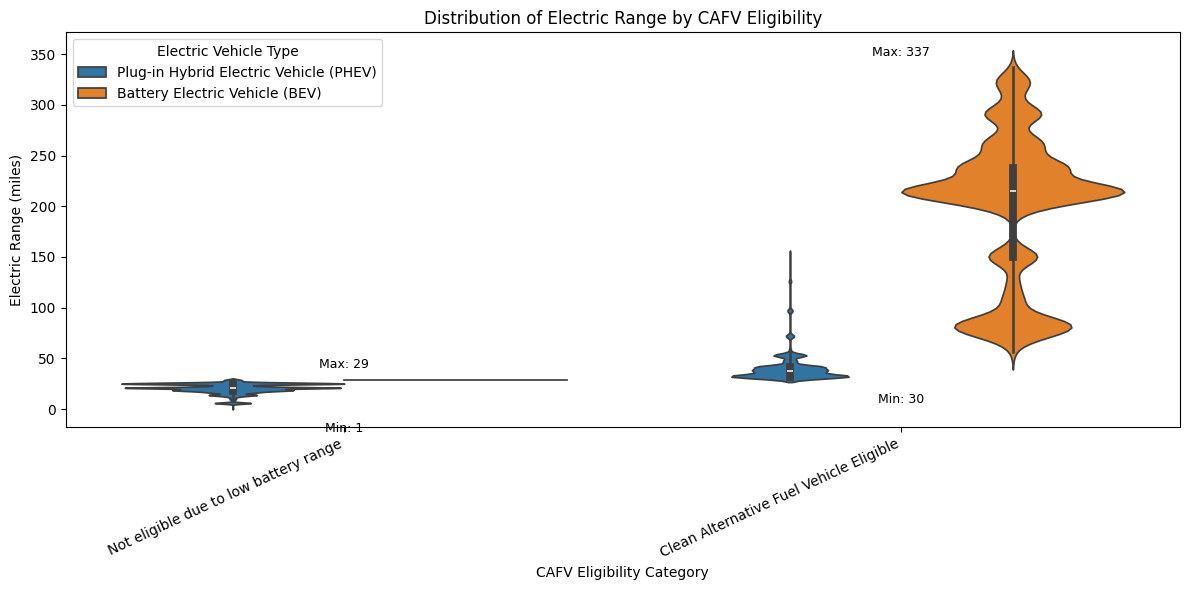

In [84]:
plt.figure(figsize=(12, 6))

ax = sns.violinplot(
    data=df_non_zero_ER,
    x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    y='Electric Range',
    hue='Electric Vehicle Type',
    dodge=True
)

# CAFV-level min/max
group_stats = (
    df_non_zero_ER
    .groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range']
    .agg(['min', 'max'])
)

# Get category positions from the axis
xticks = ax.get_xticks()
xlabels = [t.get_text() for t in ax.get_xticklabels()]

for x, label in zip(xticks, xlabels):
    min_val = group_stats.loc[label, 'min']
    max_val = group_stats.loc[label, 'max']

    ax.annotate(
        f"Min: {min_val:.0f}",
        xy=(x, min_val),
        xytext=(0, -10),
        textcoords="offset points",
        ha="center",
        va="top",
        fontsize=9
    )

    ax.annotate(
        f"Max: {max_val:.0f}",
        xy=(x, max_val),
        xytext=(0, 6),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Distribution of Electric Range by CAFV Eligibility")
plt.xlabel("CAFV Eligibility Category")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=25, ha='right')

plt.tight_layout()
plt.show()

This chart shows a clear link between CAFV eligibility and electric range.

- Non-eligible vehicles are confined below 30 miles of range, while CAFV-eligible vehicles start at 30 miles and extend well beyond 300 miles, largely driven by BEVs.

- PHEVs only qualify once they meet the 30-mile threshold, confirming that CAFV eligibility is directly tied to electric range.

#### **How does Clean Alternative Fuel Vehicle (CAFV) eligibility affect EV adoption rates?**



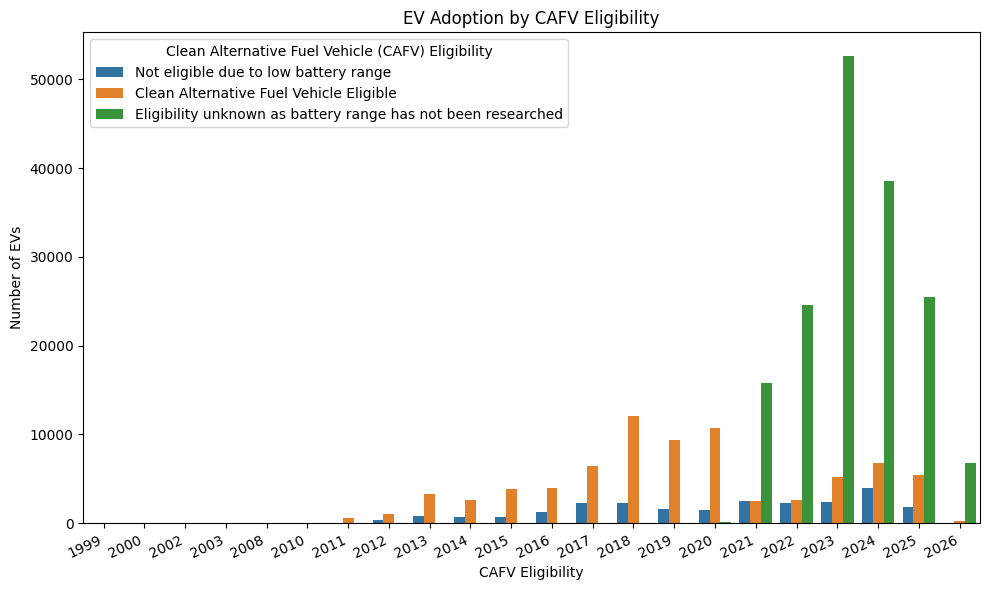

In [65]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_clean,
    x='Model Year',
    hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility'
)

plt.title("EV Adoption by CAFV Eligibility")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Number of EVs")
plt.xticks(rotation=25, ha='right')

plt.tight_layout()
plt.show()

The chart indicates a strong association between CAFV eligibility and higher EV adoption rates.
- While EV adoption increases across all eligibility categories over time, CAFV-eligible vehicles consistently show substantially higher adoption than non-eligible (low-range) vehicles.
- This gap widens noticeably after 2017–2019, coinciding with the expansion of Washington’s EV incentives, suggesting that eligibility and related policy benefits may have contributed to increased adoption.
- The sharp growth in the “eligibility unknown” category in recent years likely reflects incomplete electric range data for newer models rather than a true shift in consumer preference.

However, the chart alone does not establish causality, as factors such as technological improvements, expanded model availability, and brand effects likely also influence adoption.



### 2.6. Electric Utilities

#### **Counts of Electric Utilities**

In [148]:
# Count number unique electric utilities
print(f"Number of unique electric utilities: {df_clean['Electric Utility'].nunique()}")

Number of unique electric utilities: 77


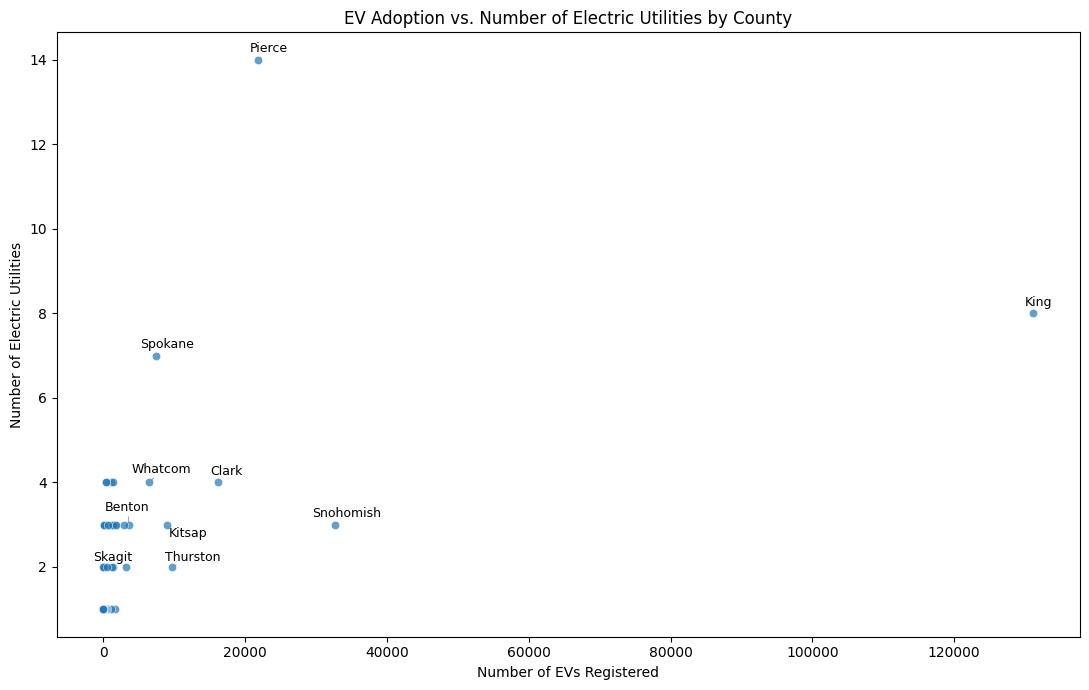

In [156]:
# County-level summary: EV count and number of electric utilities
county_utility_summary = (
    df_clean
    .groupby('County')
    .agg(
        ev_count=('County', 'size'),                 # total EV registrations
        utility_count=('Electric Utility', 'nunique') # unique utilities
    )
    .reset_index()
)

# Set the plot size
plt.figure(figsize=(11, 7))

# Scatter plot of EV counts vs. utility counts by county
ax = sns.scatterplot(
    data=county_utility_summary,
    x='ev_count',
    y='utility_count',
    alpha=0.7
)

# Label, title
ax.set_xlabel("Number of EVs Registered")
ax.set_ylabel("Number of Electric Utilities")
ax.set_title("EV Adoption vs. Number of Electric Utilities by County")

# Adding annotation
# Top 10 counties by EV count
top10 = county_utility_summary.nlargest(10, 'ev_count')

# Create text (start slightly above each point)
texts = []
for _, r in top10.iterrows():
    texts.append(
        ax.text(
            r['ev_count'],
            r['utility_count'],
            r['County'],
            fontsize=9,
            ha='center',
            va='bottom'
        )
    )

# Automatically move labels to avoid overlap (+ optional subtle arrows)
adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)
)

plt.tight_layout()
plt.show()

The chart shows a positive but non-linear relationship between EV adoption and the number of electric utilities at the county level.

- High-adoption counties such as King and Pierce are served by more utilities, reflecting greater infrastructure complexity and demand rather than a direct driver of adoption.

- In contrast, counties like Snohomish and Spokane achieve moderate EV adoption with fewer utilities, suggesting that EV growth depends more on factors such as population density, charging infrastructure, and urban development than on the number of utility providers alone.

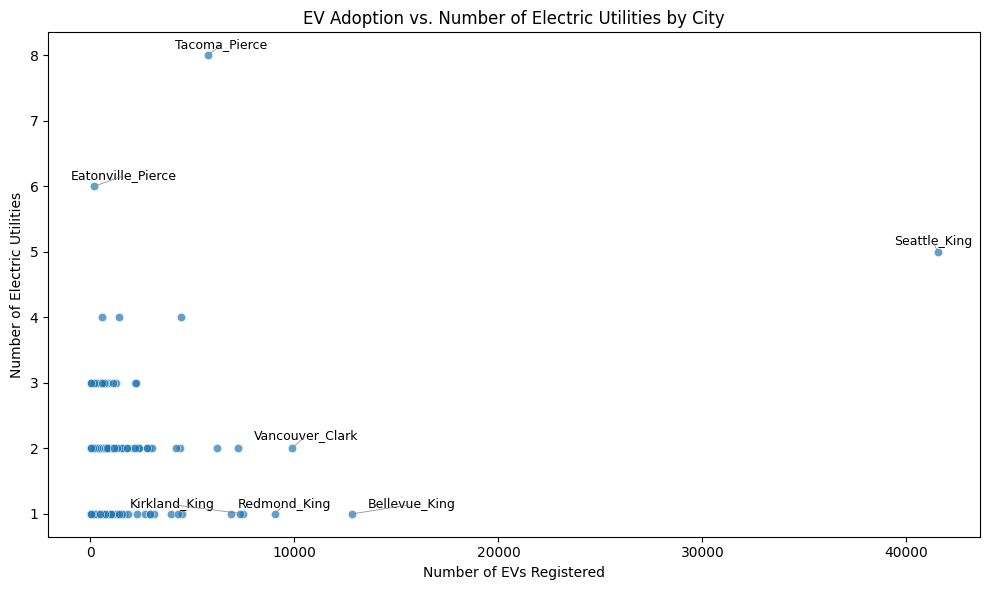

In [153]:
# City-level summary: EV count and number of electric utilities
city_utility_summary = (
    df_clean
    .groupby('City_County')
    .agg(
        ev_count=('City_County', 'size'),
        utility_count=('Electric Utility', 'nunique')
    )
    .reset_index()
)

# Set the plot size
plt.figure(figsize=(10, 6))

# Scater plot of EV counts vs. utility counts by city
ax = sns.scatterplot(
    data=city_utility_summary,
    x='ev_count',
    y='utility_count',
    alpha=0.7
)

# Label, title
ax.set_xlabel("Number of EVs Registered")
ax.set_ylabel("Number of Electric Utilities")
ax.set_title("EV Adoption vs. Number of Electric Utilities by City")

# Adding annotation
# Top 5 by EV count
top5 = city_utility_summary.nlargest(5, 'ev_count')

# Cities with utility_count > 4
many_utils = city_utility_summary[city_utility_summary['utility_count'] > 4]

# Combine + deduplicate
label_df = pd.concat([top5, many_utils]).drop_duplicates(subset=['City_County'])

# Create text (start slightly above each point)
texts = []
for _, r in label_df.iterrows():
    texts.append(
        ax.text(
            r['ev_count'],
            r['utility_count'],
            r['City_County'],
            fontsize=9,
            ha="center",
            va="bottom"
        )
    )

# Automatically move labels to avoid overlap (+ optional subtle arrows)
adjust_text(
    texts,
    ax=ax,
    expand_points=(1.2, 1.3),
    expand_text=(1.2, 1.3),
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)
)

plt.tight_layout()
plt.show()

This city-level chart shows a similar pattern to the county-level analysis:

- EV adoption and the number of electric utilities are positively related but not linearly.

- Seattle stands out with the highest EV adoption despite being served by a moderate number of utilities, while cities in Pierce County (e.g., Tacoma and Eatonville) have more utility providers but lower EV adoption.

#### **Which electric utilities serve the largest EV populations?**

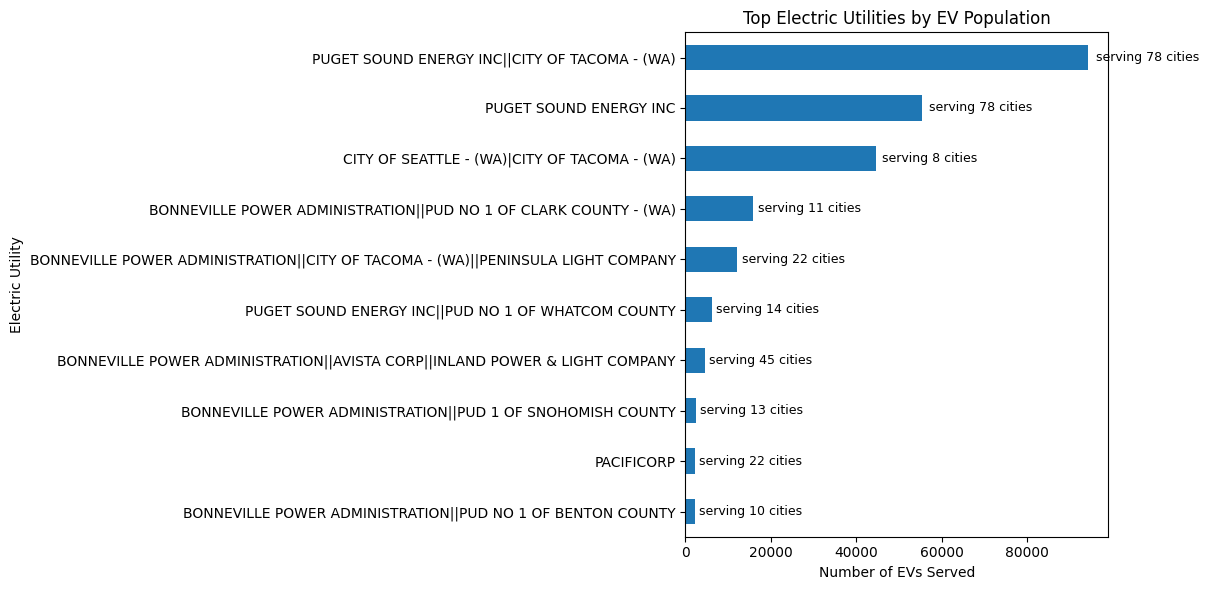

In [140]:
utility_summary = (
    df_clean
    .groupby('Electric Utility')
    .agg(
        ev_count=('Electric Utility', 'size'),          # total EV records
        unique_cities=('City_County', 'nunique')        # number of unique cities
    )
    .sort_values('ev_count', ascending=False)
)

# Select top 10 utilities by EV count
top10 = utility_summary.head(10)

plt.figure(figsize=(12, 6))
ax = top10['ev_count'].plot(kind='barh', color="#1f77b4")

plt.title("Top Electric Utilities by EV Population")
plt.xlabel("Number of EVs Served")
plt.ylabel("Electric Utility")

# Add unique city count as annotation on each bar
for i, (ev_count, city_count) in enumerate(
    zip(top10['ev_count'], top10['unique_cities'])
):
    ax.text(
        ev_count + ev_count * 0.01,   # slight offset to the right
        i,
        f" serving {city_count} cities",
        va='center',
        fontsize=9,
        color='black'
    )

# Reverse y-axis so the largest bar is on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

- The chart indicates that Puget Sound Energy serves the largest EV population by a wide margin, followed by the City of Seattle and City of Tacoma.

- These utilities primarily serve dense urban regions, highlighting that utilities operating in major metropolitan areas support the highest concentrations of EVs.

#Step Seven: Handle Outliers

## Base MSRP

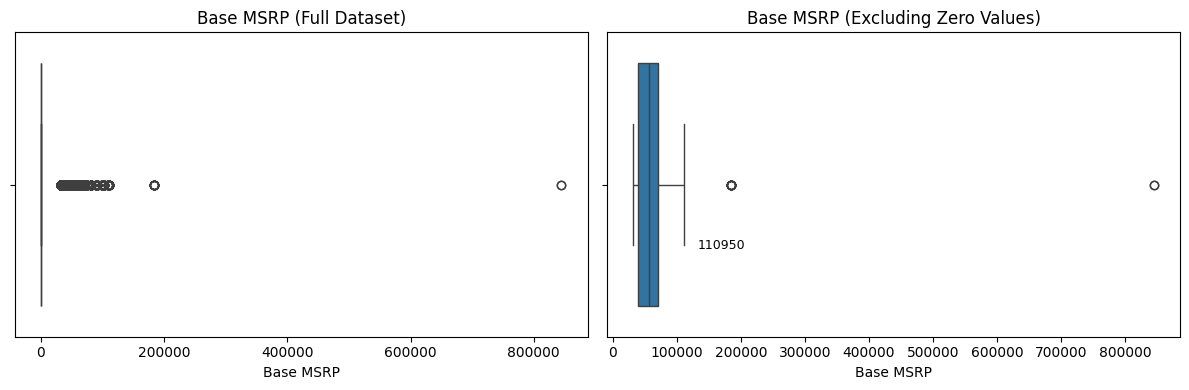

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot 1: Full Dataset
ax1 = axes[0]
sns.boxplot(x=df_clean['Base MSRP'], ax=ax1)

ax1.set_title('Base MSRP (Full Dataset)')
ax1.set_xlabel('Base MSRP')


# Plot 2: Excluding Zero Values
ax2 = axes[1]
sns.boxplot(x=df_non_zero_MSRP['Base MSRP'], ax=ax2)

lines = ax2.lines
upper_whisker_line = lines[3]
upper_whisker_y = upper_whisker_line.get_ydata().max()
upper_whisker_x = upper_whisker_line.get_xdata().max()

ax2.annotate(
    f"{upper_whisker_x:.0f}",
    xy=(upper_whisker_x, upper_whisker_y),
    xytext=(10, 0),
    textcoords="offset points",
    ha="left", va="center",
    fontsize=9
)

ax2.set_title('Base MSRP (Excluding Zero Values)')
ax2.set_xlabel('Base MSRP')


plt.tight_layout()
plt.show()


- The chart reveals a clear MSRP outlier above $110,000 that skews the distribution. To ensure a more accurate analysis of typical EV pricing, these extreme outliers should be removed when examining base MSRP.

## Electric range

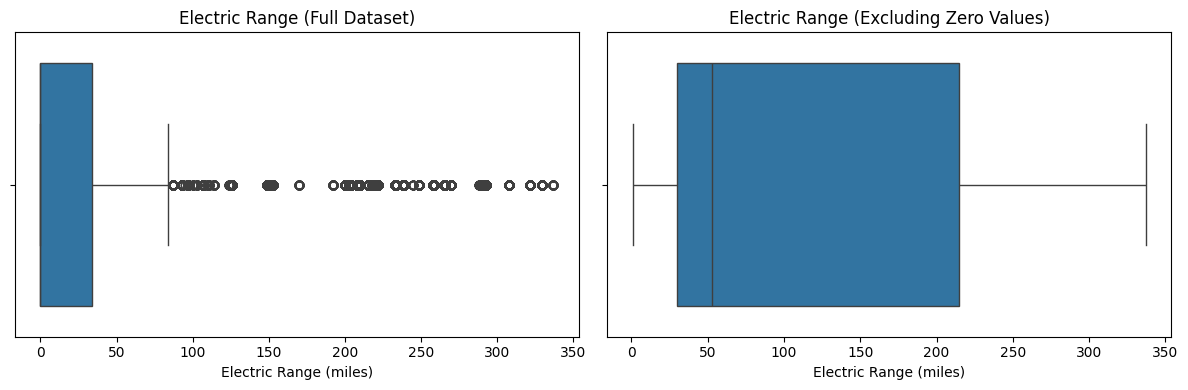

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot 1: Full Dataset
sns.boxplot(x=df_clean['Electric Range'], ax=axes[0])
axes[0].set_title('Electric Range (Full Dataset)')
axes[0].set_xlabel('Electric Range (miles)')

# Plot 2: Excluding Zero Values
sns.boxplot(x=df_non_zero_ER['Electric Range'], ax=axes[1])
axes[1].set_title('Electric Range (Excluding Zero Values)')
axes[1].set_xlabel('Electric Range (miles)')

plt.tight_layout()
plt.show()

- The full dataset is heavily skewed by zero electric range values, obscuring the true distribution of EV performance.

- After excluding zero values, electric range spans broadly from under 50 miles to over 300 miles, with no extreme outliers detected, making this cleaned distribution more appropriate for meaningful analysis.

# Conclusion

## Summary of Key Findings

1. **BEVs dominate EV adoption** in Washington, accounting for ~80% of registrations statewide, with this pattern consistent across top counties and cities. **King County and Seattle lead EV adoption**, reflecting the influence of urban density, income levels, and charging infrastructure.

2. **Tesla overwhelmingly dominates the EV market**, led by the Model Y and Model 3. Tesla’s focus on long-range BEVs sets it apart from other manufacturers, which offer more mixed BEV–PHEV portfolios.

3. **EV adoption accelerated after 2017 and surged post-2020**, peaking in the 2023 model year. Recent declines likely reflect incomplete data rather than reduced demand.

4. **Electric range strongly differentiates EV types:** BEVs show rapidly increasing range over time, while PHEVs remain limited by design. Higher range generally corresponds to higher MSRP, but **price is not driven by range alone.**

5. **CAFV eligibility is directly tied to electric range** and is associated with higher EV adoption. The widening gap between eligible and non-eligible vehicles after 2017–2019 aligns with the expansion of Washington’s EV incentives, though causality cannot be proven.

6. **Puget Sound Energy serves the largest EV population**, followed by City of Seattle and City of Tacoma utilities, underscoring the concentration of EV adoption in major metropolitan areas.

## What I Learned from the EDA Process

- Visual inspection was essential for identifying data issues early, especially zero values representing missing data and outliers, which required careful treatment.

- Meaningful patterns only emerged after addressing missing values and outliers, reinforcing the importance of data cleaning before analysis.

- Research questions evolved as insights deepened, reflecting the iterative nature of EDA.

- Separating Tesla from non-Tesla vehicles revealed clearer market dynamics that were obscured in aggregate analyses.

## Limitations & Next Steps

### Limitations

- This analysis relies on registration data and does not incorporate demographic, socioeconomic, or political variables, limiting the ability to explain why certain regions lead EV adoption.

- CAFV eligibility and adoption trends are analyzed descriptively; causal relationships cannot be established without additional policy timing and behavioral data.

- Recent model years contain incomplete registration and electric range information, which may bias trends for 2024–2025.

### Next Steps

- Incorporate demographic and socioeconomic data (e.g., income, housing type, population density) to better explain regional adoption patterns, particularly in King County.

- Analyze charging infrastructure availability and density to assess its role in shaping city-level EV adoption.

- Extend the analysis to legislative districts to explore whether clean-energy policies, voting records, or funding allocations are associated with higher EV adoption and CAFV eligibility uptake.

### Additional Research Questions for Exploratory Analysis

1. What demographic and socioeconomic factors help explain why King County leads EV adoption so strongly?

2. How does the availability and density of charging infrastructure influence adoption patterns across cities?

3. Do EV adoption and CAFV eligibility rates differ across legislative districts, and are these differences associated with local policy priorities or voting behavior?

# Reference

U.S. Department of Transportation. (n.d.). Electric vehicle population data. Data.gov.
https://catalog.data.gov/dataset/electric-vehicle-population-data

U.S. Department of Energy, Alternative Fuels Data Center. (n.d.). Electricity laws and incentives in Washington.
https://afdc.energy.gov/fuels/laws/ELEC?state=wa